In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fast')

#Whole data with divisions
df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160221/20160221_flat.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/20160306_flat.csv')
df = pd.concat([df1, df2])
images_dir = '/content/drive/MyDrive/ColabNotebooks/Project/Plots'

#Added Volume
df['AddedVolume'] = df.apply(lambda x: abs(x['V1'] - x['V0']),axis=1)

df.head()

,fov,line,cellID,parentID,frame0,frame1,t0Trans,t1Trans,divT,w0,w1,meanw,L0,L1,expfitBL0,expfitBL1,expfitBL2,area0,area1,expfitBarea0,expfitBarea1,expfitBarea2,V0,V1,expfitBV0,expfitBV1,expfitBV2,SA0,SA1,expfitBSA0,expfitBSA1,expfitBSA2,meanbeta2SA_V_4_0,Itot0,Itot1,xCM0,yCM0,xCM1,yCM1,orientation0,orientation1,AddedVolume
0,0,3,19,13,24.0,35.0,-484.9,-429.9,60.023041,0.929925,0.896546,0.896765,1.693186,3.468643,1.670594,3.635909,0.012961,1.388957,2.937302,1.358680,3.037141,0.013407,0.939451,2.001087,0.909983,2.034303,0.013408,4.946550,9.769716,4.816684,10.002898,0.012180,0.059536,179964.0,403800.0,19.871563,43.921918,20.665888,43.962054,-0.015732,0.030375,1.061636
1,0,3,20,13,24.0,35.0,-484.9,-429.9,60.023041,1.068120,0.903421,0.941669,1.721454,3.432584,1.734364,3.610223,0.012219,1.593885,2.925917,1.540253,3.014770,0.011193,1.223473,2.007312,1.129550,2.017930,0.009671,5.776508,9.742293,5.508774,9.911822,0.009790,0.043552,217748.0,418311.0,21.490142,43.789680,23.826899,43.746585,0.020643,0.051030,0.783839
2,0,3,21,14,24.0,36.0,-484.9,-424.9,65.023041,0.994468,0.844200,0.898506,1.770372,3.458268,1.833167,3.709116,0.010842,1.548345,2.766528,1.554345,3.006915,0.010152,1.117628,1.778196,1.083097,1.952144,0.009063,5.531023,9.171783,5.478505,9.871163,0.009058,0.043536,201764.0,369842.0,23.170376,43.845854,27.680966,43.591121,-0.075153,-0.021464,0.660568
3,0,3,22,14,24.0,31.0,-484.9,-449.9,40.023041,1.035828,0.802214,0.928946,1.772036,2.840223,1.687326,2.871488,0.013292,1.605269,2.140359,1.558946,2.193512,0.008537,1.202309,1.300406,1.192839,1.349021,0.003076,5.766470,7.158011,5.620526,7.297994,0.006529,0.031880,208264.0,271479.0,24.843695,43.817377,27.654597,43.595463,0.020397,0.058959,0.098097
4,0,3,23,11,24.0,34.0,-484.9,-434.9,55.023041,0.878272,0.887533,0.904345,1.718093,3.346048,1.604900,3.538703,0.014376,1.343417,2.800683,1.308319,2.977669,0.014953,0.863505,1.887069,0.879722,2.011376,0.015036,4.740514,9.329676,4.658381,9.837098,0.013591,0.069783,175018.0,325350.0,26.391974,43.652959,32.696176,43.402611,0.158602,-0.005010,1.023564


# **Growth rate**

alpha before: 1784    0.014155
Name: Rolling Average, dtype: float64
alpha after: 9800    0.020741
Name: Rolling Average, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(-7.7, 0.03, '(a)')

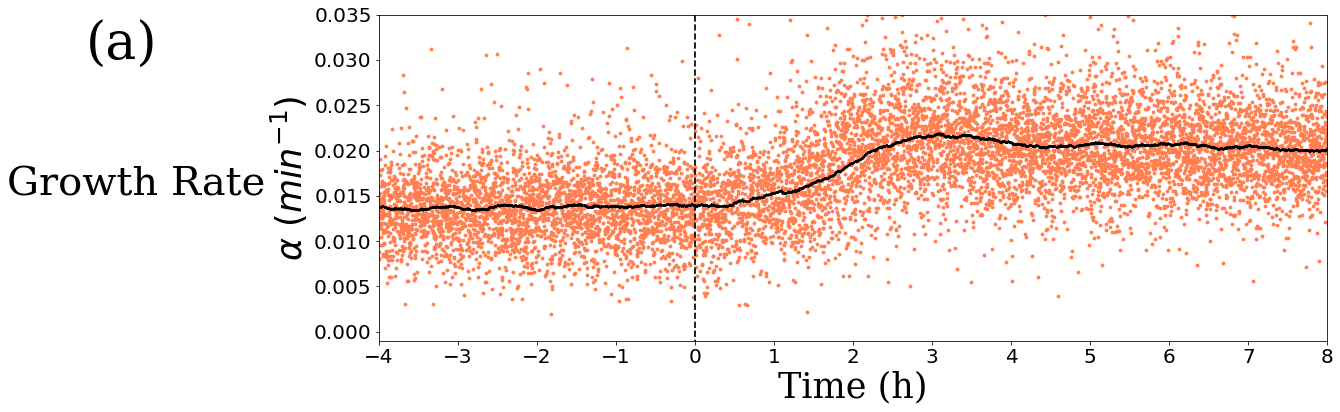

In [18]:
GrowthRate = df[['fov', 't1Trans','expfitBV2']]
GrowthRate['t1Trans'] = GrowthRate['t1Trans']
GrowthRate_Plot = GrowthRate.pivot_table('expfitBV2', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
GrowthRate_Plot = GrowthRate_Plot.fillna(0)
GrowthRate_Plot = GrowthRate_Plot['All']
GrowthRate_Plot = pd.DataFrame(GrowthRate_Plot)
GrowthRate_Plot = GrowthRate_Plot.reset_index()
GrowthRate_Plot = GrowthRate_Plot[:-1]

#Rolling average
GrowthRate_Plot['Rolling Average']= GrowthRate_Plot['All'].rolling(400, min_periods=1).mean()

#Approximate constant value before the shift
Growth_before= GrowthRate_Plot.loc[GrowthRate_Plot['t1Trans'] == -254.9]
print('alpha before: ' + str(Growth_before['Rolling Average']))

#Approximate constant value after the shift
Growth_before= GrowthRate_Plot.loc[GrowthRate_Plot['t1Trans'] == 355.1]
print('alpha after: ' + str(Growth_before['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-1, ymax=0.04,color='k',  ls='--',lw = 1.7)
plt.scatter(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['All'], s=8, color='coral')
plt.plot(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\alpha ~(min^{-1})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(-0.001,0.035)
plt.text(-8.7, 0.015, r'Growth Rate ',family="serif", fontsize=40)
plt.text(-7.7, 0.03, r'(a)',family="serif", fontsize=52)
#plt.savefig(f"{images_dir}/GrowthRate.png", bbox_inches="tight", dpi=300 )

# **Interdivision Time**

Interdivision time max: 67.80265830377795
tau max: 5937    76.4333
Name: t1Trans, dtype: object
tau before: 1784    56.37303
Name: Rolling Average, dtype: float64
tau after: 9800    38.060264
Name: Rolling Average, dtype: float64


Text(-7.7, 110, '(b)')

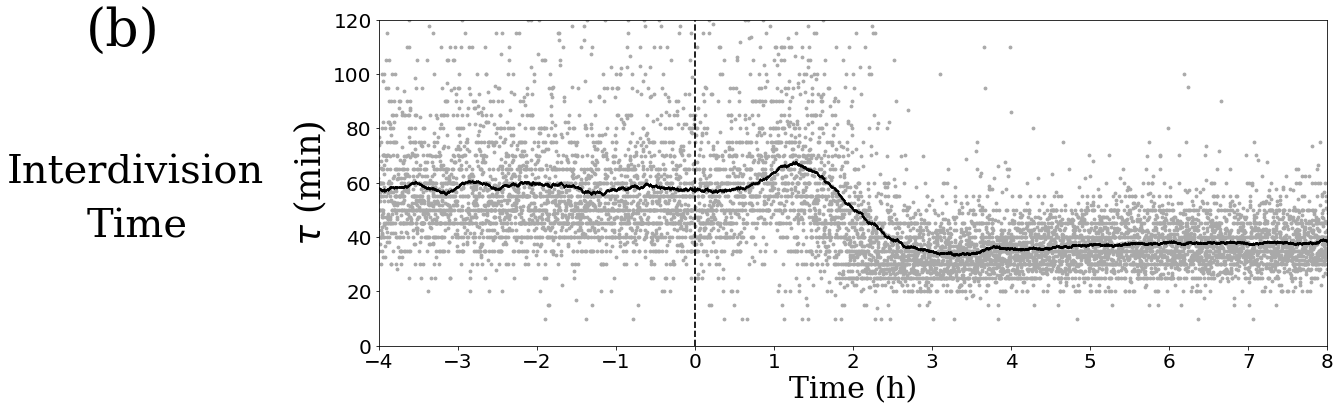

In [19]:
InterdivisionT = df[['fov', 't1Trans', 'divT']]
InterdivisionT_Plot = InterdivisionT.pivot_table('divT', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
InterdivisionT_Plot = InterdivisionT_Plot.fillna(0)
InterdivisionT_Plot = InterdivisionT_Plot['All']
InterdivisionT_Plot = pd.DataFrame(InterdivisionT_Plot)
InterdivisionT_Plot= InterdivisionT_Plot.reset_index(['t1Trans'])
InterdivisionT_Plot= InterdivisionT_Plot[:-1]
#Rolling average
InterdivisionT_Plot['Rolling Average']= InterdivisionT_Plot['All'].rolling(300, min_periods=1).mean()

#Peak 
print('Interdivision time max: ' + str(InterdivisionT_Plot['Rolling Average'].max()))
t = InterdivisionT_Plot.loc[InterdivisionT_Plot['Rolling Average'] == 67.80265830377795]
print('tau max: ' + str(t['t1Trans']))

#Approximate constant value before the shift
t_before= InterdivisionT_Plot.loc[InterdivisionT_Plot['t1Trans'] == -254.9]
print('tau before: ' + str(t_before['Rolling Average']))

#Approximate constant value after the shift
t_after= InterdivisionT_Plot.loc[InterdivisionT_Plot['t1Trans'] == 355.1]
print('tau after: ' + str(t_after['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=500,color='k',  ls='--',lw = 1.7)
plt.scatter(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['All'], s=8, color='darkgray')
plt.plot(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 30)
plt.ylabel(r'$\tau$ (min)', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,120)
plt.text(-8.7, 60, r'Interdivision',family="serif", fontsize=40)
plt.text(-7.7, 40, r'Time',family="serif", fontsize=40)
plt.text(-7.7, 110, r'(b)',family="serif", fontsize=52)
#plt.savefig(f"{images_dir}/InterdivisionTime.png", bbox_inches="tight", dpi=100)

# **Added Volume**

Added Volume max: 1.888784462976193
Added max: 6206    96.5333
Name: t1Trans, dtype: object
Added before: 1784    1.105545
Name: Rolling Average, dtype: float64
Added after: 9800    1.423355
Name: Rolling Average, dtype: float64


Text(-7.7, 3.5, '(c)')

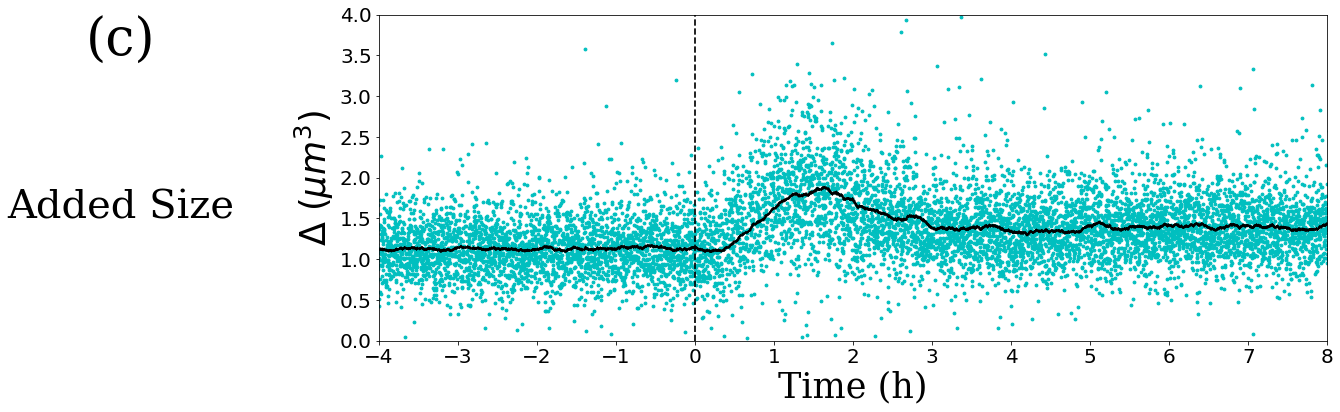

In [20]:
AddedVolume = df[['fov', 't1Trans', 'AddedVolume']]
AddedVolume_Plot = AddedVolume.pivot_table('AddedVolume', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
AddedVolume_Plot = AddedVolume_Plot.fillna(0)
AddedVolume_Plot = AddedVolume_Plot['All']
AddedVolume_Plot = pd.DataFrame(AddedVolume_Plot)
AddedVolume_Plot = AddedVolume_Plot.reset_index()
AddedVolume_Plot = AddedVolume_Plot[:-1]

#Rolling average
AddedVolume_Plot['Rolling Average']= AddedVolume_Plot['All'].rolling(200, min_periods=1).mean()

#Peak 
print('Added Volume max: ' + str(AddedVolume_Plot['Rolling Average'].max()))
Added= AddedVolume_Plot.loc[AddedVolume_Plot['Rolling Average'] == AddedVolume_Plot['Rolling Average'].max()]
print('Added max: ' + str(Added['t1Trans']))

#Approximate constant value before the shift
Added_before= AddedVolume_Plot.loc[AddedVolume_Plot['t1Trans'] == -254.9]
print('Added before: ' + str(Added_before['Rolling Average']))

#Approximate constant value after the shift
Added_after= AddedVolume_Plot.loc[AddedVolume_Plot['t1Trans'] == 355.1]
print('Added after: ' + str(Added_after['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['All'], color='c', s= 8)
plt.plot(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta~(\mu m^3)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,4)
plt.text(-8.7, 1.5, r'Added Size',family="serif", fontsize=40)
plt.text(-7.7, 3.5, r'(c)',family="serif", fontsize=52)
#plt.savefig(f"{images_dir}/AddedVolumen.png", bbox_inches="tight", dpi=100)



# **Added to initial volumen value**

Added/Volume max: 1.59555818312756
Added/Volume max: 6085    87.1667
Name: t1Trans, dtype: object
Added/Volume before: 1784    1.032681
Name: Rolling Average, dtype: float64
Added/Volume after: 9800    1.001749
Name: Rolling Average, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(-7.7, 3, '(d)')

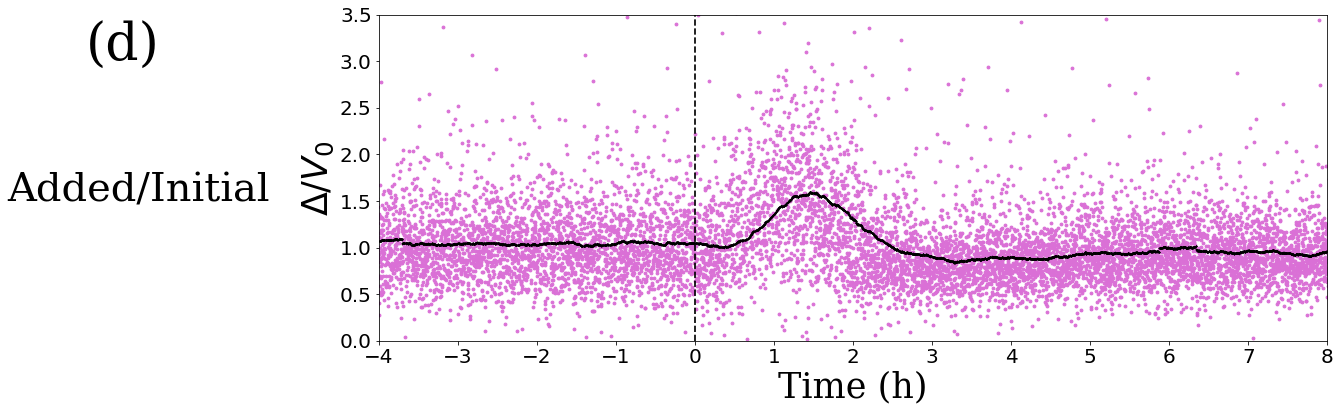

In [21]:
AddedVolume_IniVolum1 = df[['fov', 't1Trans']]
AddedVolume_IniVolum1['AddedVolume to Initial'] = df.apply(lambda x: abs(x['AddedVolume'])/x['V0'], axis=1)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum1.pivot_table('AddedVolume to Initial', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1.fillna(0)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1['All']
AddedVolume_IniVolum_Plot1 = pd.DataFrame(AddedVolume_IniVolum_Plot1)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1.reset_index()
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1[:-1]

#Rolling average
AddedVolume_IniVolum_Plot1['Rolling Average']= AddedVolume_IniVolum_Plot1['All'].rolling(400, min_periods=1).mean()

#Peak 
print('Added/Volume max: ' + str(AddedVolume_IniVolum_Plot1['Rolling Average'].max()))
AddedVolume = AddedVolume_IniVolum_Plot1.loc[AddedVolume_IniVolum_Plot1['Rolling Average'] == AddedVolume_IniVolum_Plot1['Rolling Average'].max()]
print('Added/Volume max: ' + str(AddedVolume['t1Trans']))

#Approximate constant value before the shift
AddedVolume_before= AddedVolume_IniVolum_Plot1.loc[AddedVolume_IniVolum_Plot1['t1Trans'] == -254.9]
print('Added/Volume before: ' + str(AddedVolume_before['Rolling Average']))

#Approximate constant value after the shift
AddedVolume_after= AddedVolume_IniVolum_Plot1.loc[AddedVolume_IniVolum_Plot1['t1Trans'] == 355.1]
print('Added/Volume after: ' + str(AddedVolume_after['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['All'],s=8, color='orchid')
plt.plot(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['Rolling Average'], '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta /V_0$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,3.5)
plt.text(-8.7, 1.5, r'Added/Initial',family="serif", fontsize=40)
plt.text(-7.7, 3, r'(d)',family="serif", fontsize=52)
#plt.savefig(f"{images_dir}/AddedToInitialVolumen.png", bbox_inches="tight", dpi=100)

# **Division control**

## Added volumen vs initial volume

Slope before: -0.27920657427779544
 Y interset: 1.4505213892929019
Slope after: -0.2123035351910869
 Y interset: 1.7673209451391951


Text(3, 1.5, '$\\zeta_{After}$')

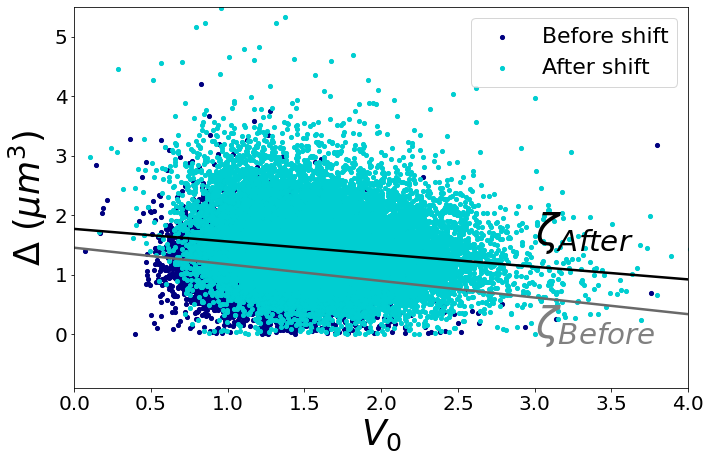

In [22]:
#Before the shift
Division_Control_before = df[['fov','t1Trans','V0','AddedVolume']]
Division_Control_before = Division_Control_before[Division_Control_before['t1Trans']<0]
Division_Control_Plot_before = Division_Control_before.pivot_table('AddedVolume', index='fov', columns='V0', aggfunc='mean',margins=True)
Division_Control_Plot_before = Division_Control_Plot_before.fillna(0)

D_before = Division_Control_Plot_before.reset_index()
D_before = D_before.loc[38:].T
D_before = D_before.drop(index='All')
D_before = D_before.reset_index(['V0'])
D_before = D_before[1:]

#After the shift
Division_Control_after = df[['fov','t1Trans','V0','AddedVolume']]
Division_Control_after = Division_Control_after[Division_Control_after['t1Trans']>=0]
Division_Control_Plot_after = Division_Control_after.pivot_table('AddedVolume', index='fov', columns='V0', aggfunc='mean',margins=True)
Division_Control_Plot_after = Division_Control_Plot_after.fillna(0)

D_after = Division_Control_Plot_after.reset_index()
D_after = D_after.loc[38:].T
D_after = D_after.drop(index='All')
D_after = D_after.reset_index(['V0'])
D_after = D_after[1:]

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
 
#Fitting function
def func(x, a, b):
    return a*x+b
#Plot experimental data points
fig = plt.figure(figsize=(11,7))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.scatter(D_before['V0'],D_before[38], color='navy',  label= 'Before shift', s=17)
plt.scatter(D_after['V0'],D_after[38], color='darkturquoise',label= 'After shift', s=17)
 
# Initial guess for the parameters
initialGuess = [1,1]    
 
#Perform the curve-fit
popt1, pcov1 = curve_fit(func, D_before['V0'], D_before[38], initialGuess)
popt2, pcov2 = curve_fit(func, D_after['V0'], D_after[38], initialGuess)

print('Slope before: '+ str(popt1[0]) + '\n Y interset: '+ str(popt1[1]))
print('Slope after: '+ str(popt2[0]) + '\n Y interset: '+ str(popt2[1]))
#x values for the fitted function
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot the fitted function
plt.plot(xFit, func(xFit, *popt1), color='dimgrey',lw=2.5)
plt.plot(xFit, func(xFit, *popt2), color='k',lw=2.5)
 
plt.legend(prop={"size":22})
plt.ylim(-0.9,5.5)
plt.xlim(0,4)
plt.xlabel(r'$V_{0}$',fontsize = 36,family = 'serif')
plt.ylabel(r'$\Delta~(\mu m^3)$', fontsize = 35,family = 'serif')
plt.text(3, -0.07, r'$\zeta_{Before}$', fontsize=42, color='gray',family = 'serif')
plt.text(3, 1.5, r'$\zeta_{After}$', fontsize=42,family = 'serif')
#plt.title('Added Volume vs Volume at birth',family = 'serif', fontsize = 35)
#plt.savefig(f"{images_dir}/DivisionControl.png", bbox_inches="tight", dpi=300)

## **Zeta**

In [23]:
#Fitting function
def func(x, a, b):
    return a*x+b
import numpy as np
from scipy.optimize import curve_fit
zeta = np.array([])
t = df['t1Trans'].min()
initialGuess = [1,1]
increment = 1000/40
iterations = 1000/increment
for i in range(int(iterations)):
  zeta_t = df[(df['t1Trans']>t) & (df['t1Trans']<(t+increment))]
  Division_Control = zeta_t[['fov','t1Trans','V0']]
  Division_Control['AddedVolume'] = zeta_t.apply(lambda x: (x['V1'] - x['V0']), axis=1)
  Division_Control_Plot = Division_Control.pivot_table('AddedVolume', index='fov', columns='V0', aggfunc='mean',margins=True)
  Division_Control_Plot = Division_Control_Plot.fillna(0)
  D= Division_Control_Plot.reset_index()
  D= D.iloc[-1: ].T
  D= D.drop(index='All')
  D= D.reset_index(['V0'])
  l = len(Division_Control_Plot)-1
  D= D[1:]
  popt1, pcov1 = curve_fit(func, D['V0'], D[l], initialGuess)
  popt1 =np.append(popt1,[t], axis =0)
  zeta = np.append(zeta,popt1, axis = 0) 
  t = t + increment

zeta = pd.DataFrame(zeta.reshape(int(iterations),3))
rolling = zeta[0].rolling(5, min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

-0.22784752227018604


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  del sys.path[0]


(-4.0, 8.0)

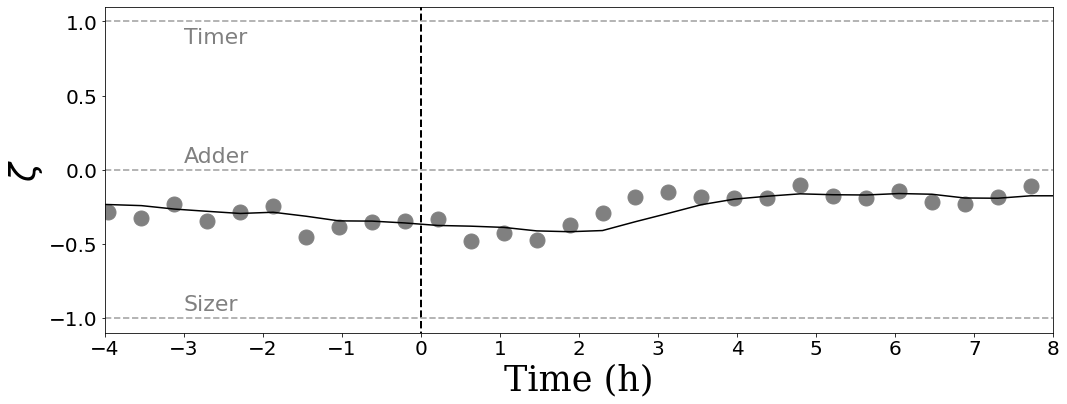

In [24]:
import numpy as np
print(rolling.mean())
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-1.5, ymax=1.5,color='k',  ls='--',lw = 2)
ax.hlines(1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(-1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(0, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\zeta$', family="serif", fontsize = 35)
plt.plot(zeta[2]/60, zeta[0], '.',color = 'gray',marker= 'o', markersize= 15,markerfacecolor="gray",alpha = 1, ms=12)
plt.plot(zeta[2]/60, rolling, color = 'k',lw = 1.5)
plt.text(-3, 0.85, r'Timer', fontsize=22, color='gray')
plt.text(-3, 0.05, r'Adder', fontsize=22, color='gray')
plt.text(-3, -0.95, r'Sizer', fontsize=22, color='gray')
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(-1.1,1.1)
plt.xlim(-4,8)
#plt.title('Volume', family = 'serif', fontsize = 40)
#plt.savefig(f"{images_dir}/ZetaControlPlot.png",bbox_inches="tight", dpi=100)

# **Reverse model**

In [25]:
data_model = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/sim_reverse_P5ter_timerescLambda0.35.dat',sep=',')
data_model = pd.DataFrame(data_model)
data_model= data_model[0:36914]  #Otherwise the RAM will die (GoogleColab)
data_model['divT'] = data_model.apply(lambda x: abs(x['t'] - x['t0']), axis=1)
data_model['Added_size'] = data_model.apply(lambda x: abs(x['xf'] - x['x0']), axis=1)

#Directorio
images_dir_model = '/content/drive/MyDrive/ColabNotebooks/Project/Plots/Model'

data_model.head()

,cell,t,t0,xf,x0,alpha,divT,Added_size
0,0,-911.030015,-1000.000000,5.224533,1.000000,0.019111,88.969985,4.224533
1,0,-881.630015,-911.030015,3.847855,2.612266,0.012809,29.400000,1.235589
2,0,-853.930015,-881.630015,2.891528,1.923928,0.013440,27.700000,0.967600
3,0,-806.430015,-853.930015,2.701578,1.445764,0.014479,47.500000,1.255814
4,0,-737.230015,-806.430015,3.177741,1.350789,0.010224,69.200000,1.826952


## **Growth rate**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


(-0.001, 0.035)

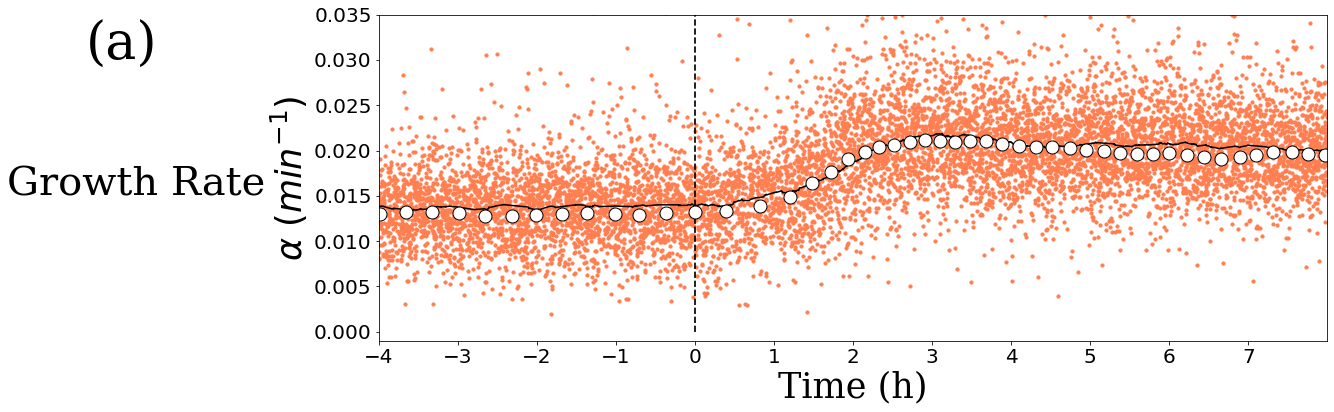

In [26]:
GrowthRate_model = data_model[['cell', 't', 'alpha']]
GrowthRate_Plot_model = GrowthRate_model.pivot_table('alpha', index='t', columns='cell', aggfunc='mean',margins=True)
GrowthRate_Plot_model = GrowthRate_Plot_model.fillna(0)
GrowthRate_Plot_model = GrowthRate_Plot_model['All']
GrowthRate_Plot_model = pd.DataFrame(GrowthRate_Plot_model)
GrowthRate_Plot_model = GrowthRate_Plot_model.reset_index()
GrowthRate_Plot_model = GrowthRate_Plot_model[:-1]

#Rolling average
GrowthRate_Plot_model['Rolling Average']= GrowthRate_Plot_model['All'].rolling(900, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.04,color='k',  ls='--',lw = 1.7)
plt.scatter(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['All'], s=10, color='coral')
plt.plot(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['Rolling Average'], '-', color='k', markersize=2)
plt.plot(GrowthRate_Plot_model['t']/60, GrowthRate_Plot_model['Rolling Average'], ls=" ", color="k",marker= 'o', markersize= 13,markerfacecolor="w", alpha=1,ms=10,markevery=300)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\alpha ~(min^{-1})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 8, 1))
plt.xlim(-4,8)
plt.text(-8.7, 0.015, r'Growth Rate ',family="serif", fontsize=40)
plt.text(-7.7, 0.03, r'(a)',family="serif", fontsize=52)
plt.ylim(-0.001,0.035)
#plt.savefig(f"{images_dir_model}/GrowthRateModel.png", bbox_inches = "tight", dpi=100)

## **Interdivision Time**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


(0.0, 120.0)

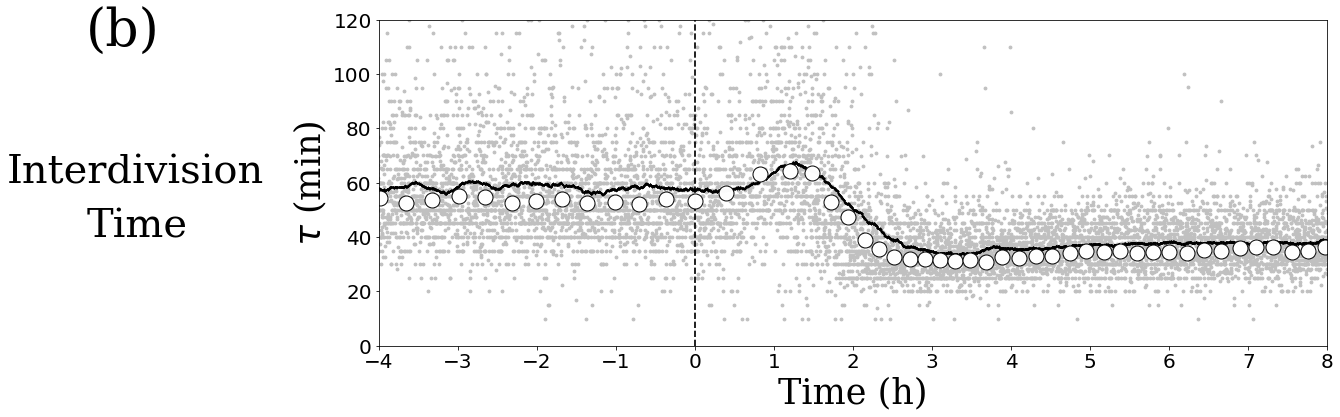

In [27]:
InterdivisionT_model = data_model[['cell', 't', 'divT']]
InterdivisionT_Plot_model = InterdivisionT_model.pivot_table('divT', index='t', columns='cell', aggfunc='mean',margins=True)
InterdivisionT_Plot_model = InterdivisionT_Plot_model.fillna(0)
InterdivisionT_Plot_model = InterdivisionT_Plot_model['All']
InterdivisionT_Plot_model = pd.DataFrame(InterdivisionT_Plot_model)
InterdivisionT_Plot_model = InterdivisionT_Plot_model.reset_index(['t'])
InterdivisionT_Plot_model = InterdivisionT_Plot_model[:-1]

#Rolling average
InterdivisionT_Plot_model['Rolling average'] = InterdivisionT_Plot_model['All'].rolling(400, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=500,color='k',  ls='--',lw = 1.7)
plt.scatter(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['All'], s=8, color='silver')
plt.plot(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.plot(InterdivisionT_Plot_model['t']/60, InterdivisionT_Plot_model['Rolling average'], ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=0.99,ms=10,markevery=300)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\tau$ (min)', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.text(-8.7, 60, r'Interdivision',family="serif", fontsize=40)
plt.text(-7.7, 40, r'Time',family="serif", fontsize=40)
plt.text(-7.7, 110, r'(b)',family="serif", fontsize=52)
plt.xlim(-4,8)
plt.ylim(0,120)
#plt.savefig(f"{images_dir_model}/InterdivisionTimeModel.png", bbox_inches = "tight", dpi=100)

## **Added size**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


Text(-7.7, 3.5, '(c)')

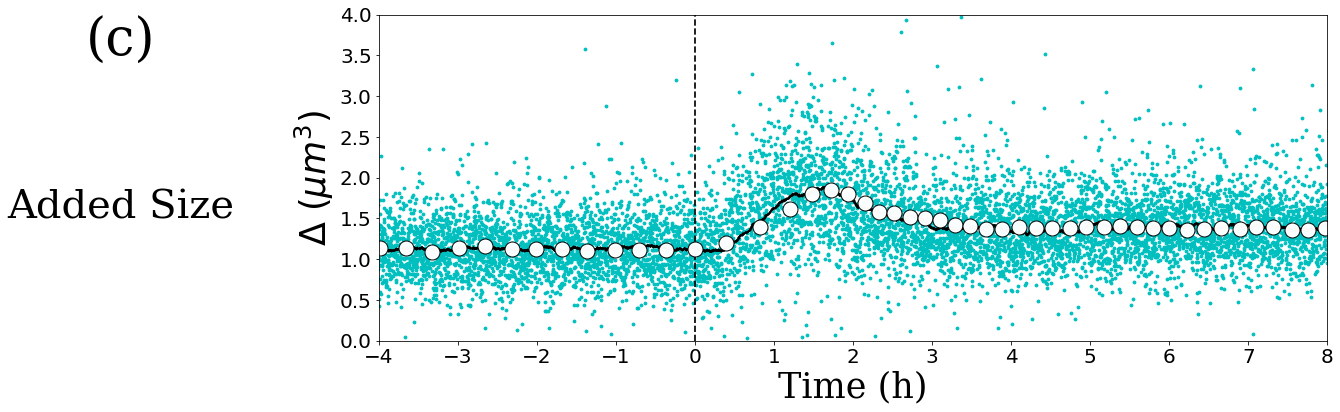

In [28]:
AddedVolume_model = data_model[['cell', 't']]
AddedVolume_model['Added_size'] = data_model.apply(lambda x: abs(x['xf'] - x['x0']),axis=1)
AddedVolume_Plot_model = AddedVolume_model.pivot_table('Added_size', index='t', columns='cell', aggfunc='mean',margins=True)
AddedVolume_Plot_model = AddedVolume_Plot_model.fillna(0)
AddedVolume_Plot_model = AddedVolume_Plot_model['All']
AddedVolume_Plot_model = pd.DataFrame(AddedVolume_Plot_model)
AddedVolume_Plot_model = AddedVolume_Plot_model.reset_index()
AddedVolume_Plot_model = AddedVolume_Plot_model[:-1]

#Rolling average
AddedVolume_Plot_model['Rolling Average'] = AddedVolume_Plot_model['All'].rolling(600, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['All'], color='c', s= 8)
#plt.scatter(AddedVolume_Plot_model['t']/60, AddedVolume_Plot_model['All'], color='c', s= 8)
plt.plot(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.plot(AddedVolume_Plot_model['t']/60, AddedVolume_Plot_model['Rolling Average'], ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=0.98,ms=10,markevery=300)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta~(\mu m^3)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,4)
plt.text(-8.7, 1.5, r'Added Size',family="serif", fontsize=40)
plt.text(-7.7, 3.5, r'(c)',family="serif", fontsize=52)
#plt.savefig(f"{images_dir_model}/AddedVolumenModelLambda0.png", bbox_inches="tight", dpi=100)

## **Added volume vs initial volume**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


Text(-7.7, 3, '(d)')

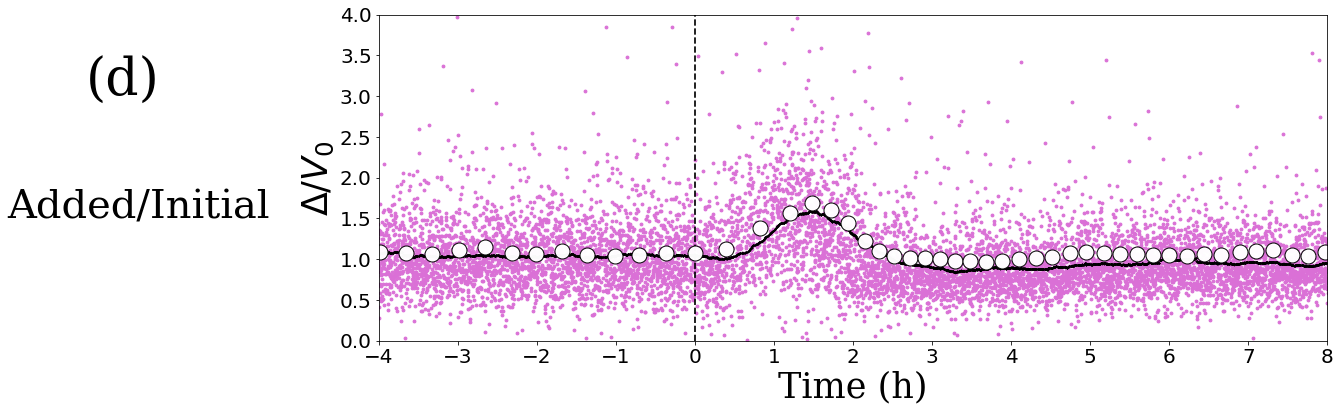

In [29]:
AddedVolume_IniVolum1_model = data_model[['cell', 't']]
AddedVolume_IniVolum1_model['AddedVolume to Initial'] = data_model.apply(lambda x: ( x['xf'] - x['x0'])/x['x0'], axis=1)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum1_model.pivot_table('AddedVolume to Initial', index='t', columns='cell', aggfunc='mean',margins=True)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model.fillna(0)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model['All']
AddedVolume_IniVolum_Plot1_model = pd.DataFrame(AddedVolume_IniVolum_Plot1_model)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model.reset_index()
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model[:-1]

#Rolling average
AddedVolume_IniVolum_Plot1_model['Rolling Average'] = AddedVolume_IniVolum_Plot1_model['All'].rolling(500, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['All'],s=8, color='orchid')
plt.plot(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['Rolling Average'], '.', color='k', markersize=1.1)
plt.plot(AddedVolume_IniVolum_Plot1_model['t']/60, AddedVolume_IniVolum_Plot1_model['Rolling Average'], ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=0.98,ms=10,markevery=300)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta /V_0$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,4)
plt.text(-8.7, 1.5, r'Added/Initial',family="serif", fontsize=40)
plt.text(-7.7, 3, r'(d)',family="serif", fontsize=52)
#plt.savefig(f"{images_dir_model}/AddedToInitialVolumenModel.png", bbox_inches = "tight", dpi=100)

## **Zeta**

In [30]:
#Fitting function
def func(x, a, b):
    return a*x+b

import numpy as np
from scipy.optimize import curve_fit

zeta_model = np.array([])
t = data_model['t'].min()
initialGuess = [1,1]
increment = 60
iterations = 2000/increment
for i in range(int(iterations)):
  zeta_t = data_model[(data_model['t']>t) & (data_model['t']<(t+increment))]
  Division_Control = zeta_t[['cell','t','x0']]
  #Division_Control['Added_size2'] = zeta_t.apply(lambda x: x[' x0']*(np.exp(x[' alpha']*x['divT'])-1), axis =1)
  Division_Control_Plot = zeta_t.pivot_table('Added_size', index='cell', columns='x0', aggfunc='mean',margins=True)
  Division_Control_Plot = Division_Control_Plot.fillna(0)
  D= Division_Control_Plot.reset_index()
  D= D.iloc[-1: ].T
  D= D.drop(index='All')
  D= D.reset_index(['x0'])
  l = len(Division_Control_Plot)-1
  D= D[1:]
  popt1, pcov1 = curve_fit(func, D['x0'], D[l], initialGuess)
  popt1 =np.append(popt1,[t], axis =0)
  zeta_model = np.append(zeta_model,popt1, axis = 0) 
  t = t + increment

zeta_model = pd.DataFrame(zeta_model.reshape(int(iterations),3))
rolling_model = zeta_model[0].rolling(6, min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  app.launch_new_instance()


Text(0.5, 1.0, '$\\zeta = -0.30 $')

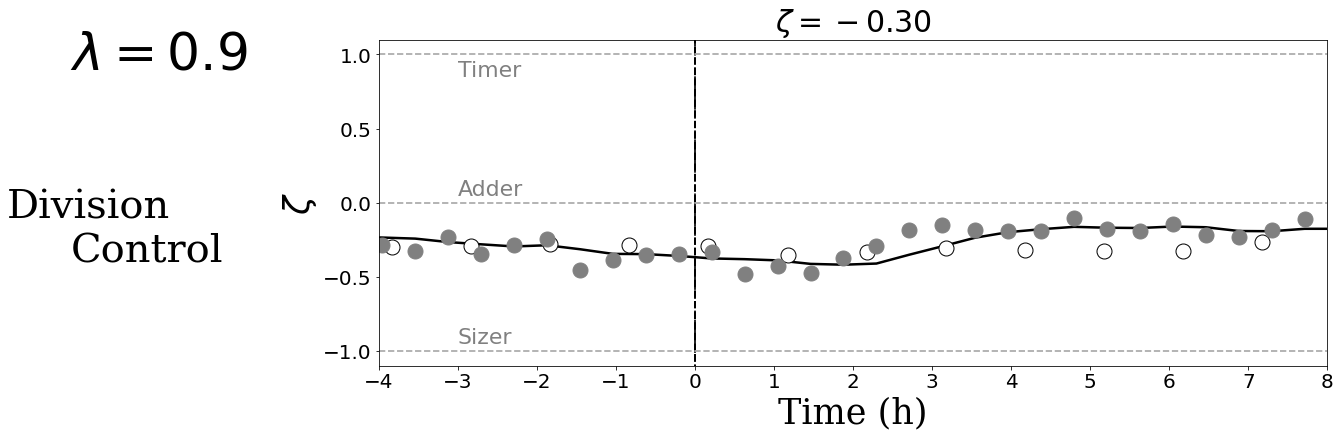

In [31]:
import numpy as np
m= rolling_model.mean()
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-1.5, ymax=1.5,color='k',  ls='--',lw = 1.7)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\zeta$', family="serif", fontsize = 35)
ax.vlines(0, ymin=-1.5, ymax=1.5,color='k',  ls='--',lw = 2)
ax.hlines(1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(-1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(0, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
plt.plot(zeta[2]/60, rolling,'-',color = 'k',lw = 2.5)
plt.plot(zeta_model[2]/60, rolling_model, ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=1,ms=10,markevery=1)
plt.plot(zeta[2]/60, zeta[0], '.',color = 'gray',marker= 'o', markersize= 15,markerfacecolor="gray",alpha = 1, ms=10)
plt.text(-3, 0.85, r'Timer', fontsize=22, color='gray')
plt.text(-3, 0.05, r'Adder', fontsize=22, color='gray')
plt.text(-3, -0.95, r'Sizer', fontsize=22, color='gray')
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(-1.1,1.1)
plt.xlim(-4,8)
plt.text(-8.7, -.1, r'Division',family="serif", fontsize=40)
plt.text(-7.9, -0.4, r'Control',family="serif", fontsize=40)
plt.text(-7.9, 0.9, r'$\lambda = 0.9$',family="serif", fontsize=52)
plt.title(r'$\zeta = {0:.2f} $'.format(m), family= "serif", size = 30)
#plt.savefig(f"{images_dir_model}/ZetaControlPlotModel00.png",bbox_inches="tight", dpi=100)

# **First, second and third generation of bacteria**

## After the shift

In [32]:
#To store the images
images_dir_Generations = '/content/drive/MyDrive/ColabNotebooks/Project/Plots/Generations'

#To store the values 
generation1_after = np.array([])
generation2_after = np.array([])
generation3_after = np.array([])

#Run over all the rows in df
for i in range(len(df)):
  #Generation 1
  if i < len(df)-1:
    if (df['t0Trans'].iloc[i+1] >=0) and (df['t0Trans'].iloc[i] <= 0) and (df['t0Trans'].iloc[i+1]<250): 
      generation1_after = np.append(df['t0Trans'].iloc[i+1], generation1_after)
      
      #Generation 2
      if i< len(df)-2:
        if (df['t0Trans'].iloc[i+2] > df['t0Trans'].iloc[i+1]):
          generation2_after = np.append(df['t0Trans'].iloc[i+2], generation2_after)
          
          #Generation 3
          if i < len(df) - 3:
            if (df['t0Trans'].iloc[i+3] > df['t0Trans'].iloc[i+2]):
              generation3_after = np.append(df['t0Trans'].iloc[i+3], generation3_after)


#Initiation
Generation1_after = df.loc[df['t0Trans']==generation1_after[0]]
Generation2_after = df.loc[df['t0Trans']==generation2_after[0]]
Generation3_after = df.loc[df['t0Trans']==generation3_after[0]]

#Generation 1
for i in generation1_after:
  Generation1_after = Generation1_after.append(df.loc[df['t0Trans']==i],ignore_index=True)

#Generation 2
for i in generation2_after:
  Generation2_after = Generation2_after.append(df.loc[df['t0Trans']==i],ignore_index=True)

#Generation 3
for i in generation3_after:
  Generation3_after = Generation3_after.append(df.loc[df['t0Trans']==i],ignore_index=True)

### **Growth rate**

In [33]:
#Generation 1
data_growth_generation1_after = Generation1_after[['fov', 't0Trans', 'expfitBV2']]
data_growth_generation1_after = data_growth_generation1_after.pivot_table('expfitBV2', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_growth_generation1_after = data_growth_generation1_after.fillna(0)
data_growth_generation1_after = data_growth_generation1_after['All']
data_growth_generation1_after = pd.DataFrame(data_growth_generation1_after)
data_growth_generation1_after = data_growth_generation1_after.reset_index(['t0Trans'])
data_growth_generation1_after['Rolling average'] = data_growth_generation1_after['All'].ewm(span=300).mean()
data_growth_generation1_after = data_growth_generation1_after[:-1]

#Generation 2
data_growth_generation2_after = Generation2_after[['fov', 't0Trans', 'expfitBV2']]
data_growth_generation2_after = data_growth_generation2_after.pivot_table('expfitBV2', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_growth_generation2_after = data_growth_generation2_after.fillna(0)
data_growth_generation2_after = data_growth_generation2_after['All']
data_growth_generation2_after = pd.DataFrame(data_growth_generation2_after)
data_growth_generation2_after = data_growth_generation2_after.reset_index(['t0Trans'])
data_growth_generation2_after['Rolling average'] = data_growth_generation2_after['All'].ewm(span=400).mean()
data_growth_generation2_after = data_growth_generation2_after[:-1]

#Generation 3
data_growth_generation3_after = Generation3_after[['fov', 't0Trans', 'expfitBV2']]
data_growth_generation3_after = data_growth_generation3_after.pivot_table('expfitBV2', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_growth_generation3_after = data_growth_generation3_after.fillna(0)
data_growth_generation3_after = data_growth_generation3_after['All']
data_growth_generation3_after = pd.DataFrame(data_growth_generation3_after)
data_growth_generation3_after = data_growth_generation3_after.reset_index(['t0Trans'])
data_growth_generation3_after['Rolling average'] = data_growth_generation3_after['All'].ewm(span=400).mean()
data_growth_generation3_after = data_growth_generation3_after[:-1]

### **Interdivision time**

In [34]:
#Generation 1
data_generation1_after = Generation1_after[['fov', 't0Trans', 'divT']]
data_generation1_after = data_generation1_after.pivot_table('divT', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_generation1_after = data_generation1_after.fillna(0)
data_generation1_after = data_generation1_after['All']
data_generation1_after = pd.DataFrame(data_generation1_after)
data_generation1_after = data_generation1_after.reset_index(['t0Trans'])
data_generation1_after['Rolling average'] = data_generation1_after['All'].ewm(span=300).mean()
data_generation1_after = data_generation1_after[:-1]

#Generation 2
data_generation2_after = Generation2_after[['fov', 't0Trans', 'divT']]
data_generation2_after = data_generation2_after.pivot_table('divT', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_generation2_after = data_generation2_after.fillna(0)
data_generation2_after = data_generation2_after['All']
data_generation2_after = pd.DataFrame(data_generation2_after)
data_generation2_after = data_generation2_after.reset_index(['t0Trans'])
data_generation2_after['Rolling average'] = data_generation2_after['All'].ewm(span=400).mean()
data_generation2_after = data_generation2_after[:-1]

#Generation 3
data_generation3_after = Generation3_after[['fov', 't0Trans', 'divT']]
data_generation3_after = data_generation3_after.pivot_table('divT', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_generation3_after = data_generation3_after.fillna(0)
data_generation3_after = data_generation3_after['All']
data_generation3_after = pd.DataFrame(data_generation3_after)
data_generation3_after = data_generation3_after.reset_index(['t0Trans'])
data_generation3_after['Rolling average'] = data_generation3_after['All'].ewm(span=400).mean()
data_generation3_after = data_generation3_after[:-1]

### **Added size**

In [35]:
#Generation 1
data_added_generation1_after = Generation1_after[['fov', 't0Trans', 'AddedVolume']]
data_added_generation1_after = data_added_generation1_after.pivot_table('AddedVolume', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_added_generation1_after = data_added_generation1_after.fillna(0)
data_added_generation1_after = data_added_generation1_after['All']
data_added_generation1_after = pd.DataFrame(data_added_generation1_after)
data_added_generation1_after = data_added_generation1_after.reset_index(['t0Trans'])
data_added_generation1_after['Rolling average'] = data_added_generation1_after['All'].ewm(span=300).mean()
data_added_generation1_after = data_added_generation1_after[:-1]

#Generation 2
data_added_generation2_after = Generation2_after[['fov', 't0Trans', 'AddedVolume']]
data_added_generation2_after = data_added_generation2_after.pivot_table('AddedVolume', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_added_generation2_after = data_added_generation2_after.fillna(0)
data_added_generation2_after = data_added_generation2_after['All']
data_added_generation2_after = pd.DataFrame(data_added_generation2_after)
data_added_generation2_after = data_added_generation2_after.reset_index(['t0Trans'])
data_added_generation2_after['Rolling average'] = data_added_generation2_after['All'].ewm(span=400).mean()
data_added_generation2_after = data_added_generation2_after[:-1]

#Generation 3
data_added_generation3_after = Generation3_after[['fov', 't0Trans', 'AddedVolume']]
data_added_generation3_after = data_added_generation3_after.pivot_table('AddedVolume', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_added_generation3_after = data_added_generation3_after.fillna(0)
data_added_generation3_after = data_added_generation3_after['All']
data_added_generation3_after = pd.DataFrame(data_added_generation3_after)
data_added_generation3_after = data_added_generation3_after.reset_index(['t0Trans'])
data_added_generation3_after['Rolling average'] = data_added_generation3_after['All'].ewm(span=400).mean()
data_added_generation3_after = data_added_generation3_after[:-1]

## **Before the shift**

In [36]:
#To store the values
generation1_before = np.array([])
generation2_before = np.array([])
generation3_before = np.array([])

#Run over all the rows in df
for i in range(len(df)): 
  #Generation 1 
  if i < len(df)-1:
    if (df['t0Trans'].iloc[i+1] >=0) and (df['t0Trans'].iloc[i] <= 0) and (df['t0Trans'].iloc[i+1]<250): 
      generation1_before = np.append(df['t0Trans'].iloc[i], generation1_before)

      #Generation 2
      if i< len(df)+1:
        if (df['t0Trans'].iloc[i] > df['t0Trans'].iloc[i-1]):
          generation2_before = np.append(df['t0Trans'].iloc[i-1], generation2_before)

          #Generation 3
          if i < len(df) + 2:
            if (df['t0Trans'].iloc[i-1] > df['t0Trans'].iloc[i-2]):
              generation3_before = np.append(df['t0Trans'].iloc[i-2], generation3_before)

#Initiation
Generation1_before = df.loc[df['t0Trans']==generation1_before[0]]
Generation2_before = df.loc[df['t0Trans']==generation2_before[0]]
Generation3_before = df.loc[df['t0Trans']==generation3_before[0]]

#Generation 1
for i in generation1_before:
  Generation1_before = Generation1_before.append(df.loc[df['t0Trans']==i],ignore_index=True)

#Generation 2
for i in generation2_before:
  Generation2_before = Generation2_before.append(df.loc[df['t0Trans']==i],ignore_index=True)

#Generation 3
for i in generation3_before:
  Generation3_before = Generation3_before.append(df.loc[df['t0Trans']==i],ignore_index=True)


### **Growth rate**

In [37]:
#Generation 1
data_growth_generation1_before = Generation1_before[['fov', 't0Trans', 'expfitBL2']]
data_growth_generation1_before = data_growth_generation1_before.pivot_table('expfitBL2', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_growth_generation1_before = data_growth_generation1_before.fillna(0)
data_growth_generation1_before = data_growth_generation1_before['All']
data_growth_generation1_before = pd.DataFrame(data_growth_generation1_before)
data_growth_generation1_before = data_growth_generation1_before.reset_index(['t0Trans'])
data_growth_generation1_before['Rolling average'] = data_growth_generation1_before['All'].ewm(span=300).mean()
data_growth_generation1_before = data_growth_generation1_before[:-1]

#Generation 2
data_growth_generation2_before = Generation2_before[['fov', 't0Trans', 'expfitBL2']]
data_growth_generation2_before = data_growth_generation2_before.pivot_table('expfitBL2', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_growth_generation2_before = data_growth_generation2_before.fillna(0)
data_growth_generation2_before = data_growth_generation2_before['All']
data_growth_generation2_before = pd.DataFrame(data_growth_generation2_before)
data_growth_generation2_before = data_growth_generation2_before.reset_index(['t0Trans'])
data_growth_generation2_before['Rolling average'] = data_growth_generation2_before['All'].ewm(span=400).mean()
data_growth_generation2_before = data_growth_generation2_before[:-1]

#Generation 3
data_growth_generation3_before = Generation3_before[['fov', 't0Trans', 'expfitBL2']]
data_growth_generation3_before = data_growth_generation3_before.pivot_table('expfitBL2', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_growth_generation3_before = data_growth_generation3_before.fillna(0)
data_growth_generation3_before = data_growth_generation3_before['All']
data_growth_generation3_before = pd.DataFrame(data_growth_generation3_before)
data_growth_generation3_before = data_growth_generation3_before.reset_index(['t0Trans'])
data_growth_generation3_before['Rolling average'] = data_growth_generation3_before['All'].ewm(span=400).mean()
data_growth_generation3_before = data_growth_generation3_before[:-1]

### **Interdivision Time**

In [38]:
#Generation 1
data_generation1_before = Generation1_before[['fov', 't0Trans', 'divT']]
data_generation1_before = data_generation1_before.pivot_table('divT', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_generation1_before = data_generation1_before.fillna(0)
data_generation1_before = data_generation1_before['All']
data_generation1_before = pd.DataFrame(data_generation1_before)
data_generation1_before = data_generation1_before.reset_index(['t0Trans'])
data_generation1_before['Rolling average'] = data_generation1_before['All'].ewm(span=300).mean()
data_generation1_before = data_generation1_before[:-1]

#Generation 2
data_generation2_before = Generation2_before[['fov', 't0Trans', 'divT']]
data_generation2_before = data_generation2_before.pivot_table('divT', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_generation2_before = data_generation2_before.fillna(0)
data_generation2_before = data_generation2_before['All']
data_generation2_before = pd.DataFrame(data_generation2_before)
data_generation2_before = data_generation2_before.reset_index(['t0Trans'])
data_generation2_before['Rolling average'] = data_generation2_before['All'].ewm(span=400).mean()
data_generation2_before = data_generation2_before[:-1]

#Generation 3
data_generation3_before = Generation3_before[['fov', 't0Trans', 'divT']]
data_generation3_before = data_generation3_before.pivot_table('divT', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_generation3_before = data_generation3_before.fillna(0)
data_generation3_before = data_generation3_before['All']
data_generation3_before = pd.DataFrame(data_generation3_before)
data_generation3_before = data_generation3_before.reset_index(['t0Trans'])
data_generation3_before['Rolling average'] = data_generation3_before['All'].ewm(span=400).mean()
data_generation3_before= data_generation3_before[:-1]

### **Added size**

In [39]:
#Generation 1
data_added_generation1_before = Generation1_before[['fov', 't0Trans', 'AddedVolume']]
data_added_generation1_before = data_added_generation1_before.pivot_table('AddedVolume', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_added_generation1_before = data_added_generation1_before.fillna(0)
data_added_generation1_before = data_added_generation1_before['All']
data_added_generation1_before = pd.DataFrame(data_added_generation1_before)
data_added_generation1_before = data_added_generation1_before.reset_index(['t0Trans'])
data_added_generation1_before['Rolling average'] = data_added_generation1_before['All'].ewm(span=300).mean()
data_added_generation1_before = data_added_generation1_before[:-1]

#Generation 2
data_added_generation2_before = Generation2_before[['fov', 't0Trans', 'AddedVolume']]
data_added_generation2_before = data_added_generation2_before.pivot_table('AddedVolume', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_added_generation2_before = data_added_generation2_before.fillna(0)
data_added_generation2_before = data_added_generation2_before['All']
data_added_generation2_before = pd.DataFrame(data_added_generation2_before)
data_added_generation2_before = data_added_generation2_before.reset_index(['t0Trans'])
data_added_generation2_before['Rolling average'] = data_added_generation2_before['All'].ewm(span=400).mean()
data_added_generation2_before = data_added_generation2_before[:-1]

#Generation 3
data_added_generation3_before = Generation3_before[['fov', 't0Trans', 'AddedVolume']]
data_added_generation3_before = data_added_generation3_before.pivot_table('AddedVolume', index='t0Trans', columns='fov', aggfunc='mean',margins=True)
data_added_generation3_before = data_added_generation3_before.fillna(0)
data_added_generation3_before = data_added_generation3_before['All']
data_added_generation3_before = pd.DataFrame(data_added_generation3_before)
data_added_generation3_before = data_added_generation3_before.reset_index(['t0Trans'])
data_added_generation3_before['Rolling average'] = data_added_generation3_before['All'].ewm(span=400).mean()
data_added_generation3_before = data_added_generation3_before[:-1]

## **Combination Before and after**

### **Growth rate**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] 

(0.0075, 0.02)

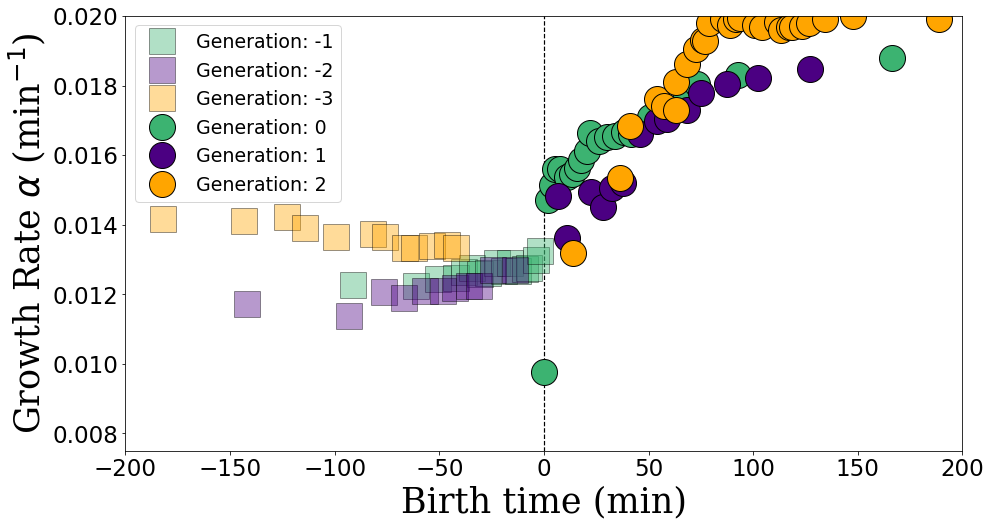

In [41]:
data_generation3_after1 = data_generation3_after[data_generation3_after['t0Trans']>35]
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.02,color='k',  ls='--',lw = 1.2)
plt.plot(data_growth_generation1_before['t0Trans'], data_growth_generation1_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=22, label = 'Generation: -1')
plt.plot(data_growth_generation2_before['t0Trans'], data_growth_generation2_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=15, label = 'Generation: -2')
plt.plot(data_growth_generation3_before['t0Trans'], data_growth_generation3_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=5, label = 'Generation: -3')
plt.plot(data_growth_generation1_after['t0Trans'], data_growth_generation1_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=17, label = 'Generation: 0')
plt.plot(data_growth_generation2_after['t0Trans'], data_growth_generation2_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=13, label = 'Generation: 1')
plt.plot(data_growth_generation3_after['t0Trans'], data_growth_generation3_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=3, label = 'Generation: 2')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Growth Rate $\alpha$ (min$^{-1}$)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0.0075,0.02)
#plt.savefig(f"{images_dir_Generations}/GrowthBeforeAfter.pdf", bbox_inches="tight")

### **Interdivision time**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] 

(35.0, 80.0)

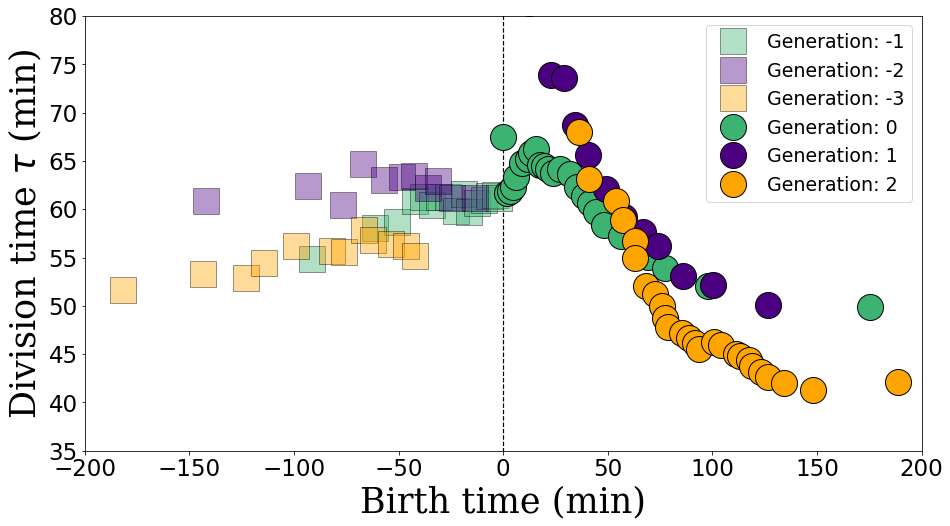

In [40]:
data_generation3_after1 = data_generation3_after[data_generation3_after['t0Trans']>35]
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=120,color='k',  ls='--',lw = 1.2)
plt.plot(data_generation1_before['t0Trans'], data_generation1_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=22, label = 'Generation: -1')
plt.plot(data_generation2_before['t0Trans'], data_generation2_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=15, label = 'Generation: -2')
plt.plot(data_generation3_before['t0Trans'], data_generation3_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=5, label = 'Generation: -3')
plt.plot(data_generation1_after['t0Trans'], data_generation1_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=15, label = 'Generation: 0')
plt.plot(data_generation2_after['t0Trans'], data_generation2_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=14, label = 'Generation: 1')
plt.plot(data_generation3_after1['t0Trans'], data_generation3_after1['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=3, label = 'Generation: 2')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Division time $\tau$ (min)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(35,80)
#plt.savefig(f"{images_dir_Generations}/InterdivisionTimeBeforeAfter.pdf", bbox_inches="tight")

### **Added size**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] 

(0.2, 3.0)

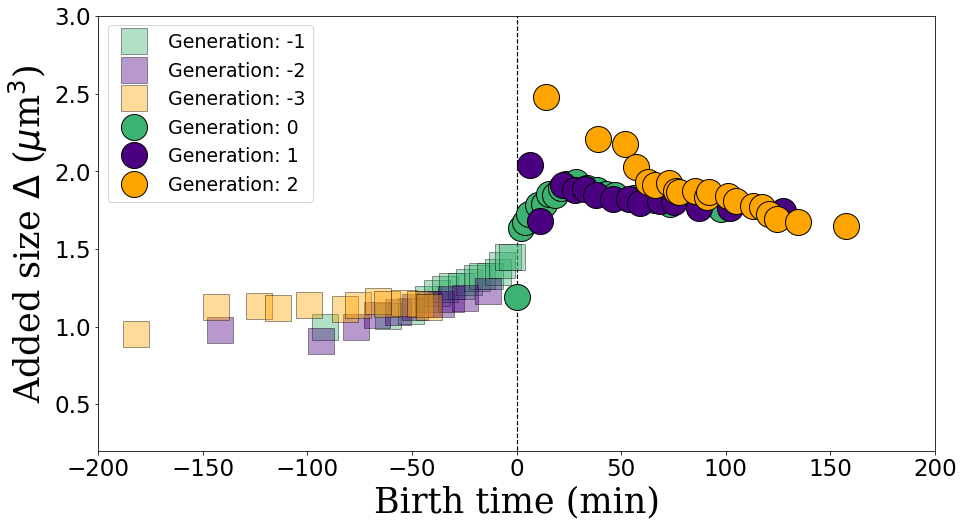

In [42]:
data_generation3_after1 = data_generation3_after[data_generation3_after['t0Trans']>35]
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=3,color='k',  ls='--',lw = 1.2)
plt.plot(data_added_generation1_before['t0Trans'], data_added_generation1_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=22, label = 'Generation: -1')
plt.plot(data_added_generation2_before['t0Trans'], data_added_generation2_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=15, label = 'Generation: -2')
plt.plot(data_added_generation3_before['t0Trans'], data_added_generation3_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=5, label = 'Generation: -3')
plt.plot(data_added_generation1_after['t0Trans'], data_added_generation1_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=20, label = 'Generation: 0')
plt.plot(data_added_generation2_after['t0Trans'], data_added_generation2_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=13, label = 'Generation: 1')
plt.plot(data_added_generation3_after['t0Trans'], data_added_generation3_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=4, label = 'Generation: 2')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Added size $\Delta$ ($\mu$m$^{3}$)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0.2,3)
#plt.savefig(f"{images_dir_Generations}/AddedSizeBeforeAfter.pdf", bbox_inches="tight")

# **Model: First, second and third generation of bacteria**

In [44]:
#Run this first
Data_model = data_model.rename(columns = {'t0': 't0Trans', 't': 't1Trans', 'Added_size': 'AddedVolume'}, inplace = False)

## **After the shift**

In [45]:
#To store the values
generation1_after_model = np.array([])
generation2_after_model = np.array([])
generation3_after_model = np.array([])

#Run over all the rows in df
for i in range(len(Data_model)):  
  #Generation 1 
  if i < len(Data_model)-1:
    if (Data_model['t0Trans'].iloc[i+1] >=0) and (Data_model['t0Trans'].iloc[i] <= 0) and (Data_model['t0Trans'].iloc[i+1]<250): 
      generation1_after_model = np.append(Data_model['t0Trans'].iloc[i+1], generation1_after_model)
      
      #Generation 2
      if i< len(Data_model)-2:
        if (Data_model['t0Trans'].iloc[i+2] > Data_model['t0Trans'].iloc[i+1]):
          generation2_after_model = np.append(Data_model['t0Trans'].iloc[i+2], generation2_after_model)
          
          #Generation 3
          if i < len(Data_model) - 3:
            if (Data_model['t0Trans'].iloc[i+3] > Data_model['t0Trans'].iloc[i+2]):
              generation3_after_model = np.append(Data_model['t0Trans'].iloc[i+3], generation3_after_model)


#Initiation
Generation1_after_model = Data_model.loc[Data_model['t0Trans']==generation1_after_model[0]]
Generation2_after_model = Data_model.loc[Data_model['t0Trans']==generation2_after_model[0]]
Generation3_after_model = Data_model.loc[Data_model['t0Trans']==generation3_after_model[0]]

#Generation 1
for i in generation1_after_model:
  Generation1_after_model = Generation1_after_model.append(Data_model.loc[Data_model['t0Trans']==i],ignore_index=True)

#Generation 2
for i in generation2_after_model:
  Generation2_after_model = Generation2_after_model.append(Data_model.loc[Data_model['t0Trans']==i],ignore_index=True)

#Generation 3
for i in generation3_after_model:
  Generation3_after_model = Generation3_after_model.append(Data_model.loc[Data_model['t0Trans']==i],ignore_index=True)


### **Growth rate**

In [46]:
#Generation 1
data_growth_generation1_after_model = Generation1_after_model[['cell', 't0Trans', 'alpha']]
data_growth_generation1_after_model = data_growth_generation1_after_model.pivot_table('alpha', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_growth_generation1_after_model = data_growth_generation1_after_model.fillna(0)
data_growth_generation1_after_model = data_growth_generation1_after_model['All']
data_growth_generation1_after_model = pd.DataFrame(data_growth_generation1_after_model)
data_growth_generation1_after_model = data_growth_generation1_after_model.reset_index(['t0Trans'])
data_growth_generation1_after_model['Rolling average'] = data_growth_generation1_after_model['All'].ewm(span=200).mean()
data_growth_generation1_after_model = data_growth_generation1_after_model[:-1]

#Genegrowthn 2
data_growth_generation2_after_model = Generation2_after_model[['cell', 't0Trans', 'alpha']]
data_growth_generation2_after_model = data_growth_generation2_after_model.pivot_table('alpha', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_growth_generation2_after_model = data_growth_generation2_after_model.fillna(0)
data_growth_generation2_after_model = data_growth_generation2_after_model['All']
data_growth_generation2_after_model = pd.DataFrame(data_growth_generation2_after_model)
data_growth_generation2_after_model = data_growth_generation2_after_model.reset_index(['t0Trans'])
data_growth_generation2_after_model['Rolling average'] = data_growth_generation2_after_model['All'].ewm(span=200).mean()
data_growth_generation2_after_model = data_growth_generation2_after_model[:-1]

#Gen_growtheration 3
data_growth_generation3_after_model = Generation3_after_model[['cell', 't0Trans', 'alpha']]
data_growth_generation3_after_model = data_growth_generation3_after_model.pivot_table('alpha', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_growth_generation3_after_model = data_growth_generation3_after_model.fillna(0)
data_growth_generation3_after_model = data_growth_generation3_after_model['All']
data_growth_generation3_after_model = pd.DataFrame(data_growth_generation3_after_model)
data_growth_generation3_after_model = data_growth_generation3_after_model.reset_index(['t0Trans'])
data_growth_generation3_after_model['Rolling average'] = data_growth_generation3_after_model['All'].ewm(span=200).mean()
data_growth_generation3_after_model = data_growth_generation3_after_model[:-1]

### **Interdivision time**

In [47]:
#Generation 1
data_generation1_after_model = Generation1_after_model[['cell', 't0Trans', 'divT']]
data_generation1_after_model = data_generation1_after_model.pivot_table('divT', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_generation1_after_model = data_generation1_after_model.fillna(0)
data_generation1_after_model = data_generation1_after_model['All']
data_generation1_after_model = pd.DataFrame(data_generation1_after_model)
data_generation1_after_model = data_generation1_after_model.reset_index(['t0Trans'])
data_generation1_after_model['Rolling average'] = data_generation1_after_model['All'].ewm(span=200).mean()
data_generation1_after_model = data_generation1_after_model[:-1]

#Generation 2
data_generation2_after_model = Generation2_after_model[['cell', 't0Trans', 'divT']]
data_generation2_after_model = data_generation2_after_model.pivot_table('divT', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_generation2_after_model = data_generation2_after_model.fillna(0)
data_generation2_after_model = data_generation2_after_model['All']
data_generation2_after_model = pd.DataFrame(data_generation2_after_model)
data_generation2_after_model = data_generation2_after_model.reset_index(['t0Trans'])
data_generation2_after_model['Rolling average'] = data_generation2_after_model['All'].ewm(span=200).mean()
data_generation2_after_model = data_generation2_after_model[:-1]

#Generation 3
data_generation3_after_model = Generation3_after_model[['cell', 't0Trans', 'divT']]
data_generation3_after_model = data_generation3_after_model.pivot_table('divT', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_generation3_after_model = data_generation3_after_model.fillna(0)
data_generation3_after_model = data_generation3_after_model['All']
data_generation3_after_model = pd.DataFrame(data_generation3_after_model)
data_generation3_after_model = data_generation3_after_model.reset_index(['t0Trans'])
data_generation3_after_model['Rolling average'] = data_generation3_after_model['All'].ewm(span=200).mean()
data_generation3_after_model = data_generation3_after_model[:-1]

### **Added size**

In [48]:
#Generation 1
data_added_generation1_after_model = Generation1_after_model[['cell', 't0Trans', 'AddedVolume']]
data_added_generation1_after_model = data_added_generation1_after_model.pivot_table('AddedVolume', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_added_generation1_after_model = data_added_generation1_after_model.fillna(0)
data_added_generation1_after_model = data_added_generation1_after_model['All']
data_added_generation1_after_model = pd.DataFrame(data_added_generation1_after_model)
data_added_generation1_after_model = data_added_generation1_after_model.reset_index(['t0Trans'])
data_added_generation1_after_model['Rolling average'] = data_added_generation1_after_model['All'].ewm(span=200).mean()
data_added_generation1_after_model = data_added_generation1_after_model[:-1]

#Generation 2
data_added_generation2_after_model = Generation2_after_model[['cell', 't0Trans', 'AddedVolume']]
data_added_generation2_after_model = data_added_generation2_after_model.pivot_table('AddedVolume', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_added_generation2_after_model = data_added_generation2_after_model.fillna(0)
data_added_generation2_after_model = data_added_generation2_after_model['All']
data_added_generation2_after_model = pd.DataFrame(data_added_generation2_after_model)
data_added_generation2_after_model = data_added_generation2_after_model.reset_index(['t0Trans'])
data_added_generation2_after_model['Rolling average'] = data_added_generation2_after_model['All'].ewm(span=200).mean()
data_added_generation2_after_model = data_added_generation2_after_model[:-1]

#Gen_addederation 3
data_added_generation3_after_model = Generation3_after_model[['cell', 't0Trans', 'AddedVolume']]
data_added_generation3_after_model = data_added_generation3_after_model.pivot_table('AddedVolume', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_added_generation3_after_model = data_added_generation3_after_model.fillna(0)
data_added_generation3_after_model = data_added_generation3_after_model['All']
data_added_generation3_after_model = pd.DataFrame(data_added_generation3_after_model)
data_added_generation3_after_model = data_added_generation3_after_model.reset_index(['t0Trans'])
data_added_generation3_after_model['Rolling average'] = data_added_generation3_after_model['All'].ewm(span=200).mean()
data_added_generation3_after_model = data_added_generation3_after_model[:-1]

## **Before the shift**

In [49]:
#To store values
generation1_before_model = np.array([])
generation2_before_model = np.array([])
generation3_before_model = np.array([])

#Run over all the rows in df
for i in range(len(Data_model)):  
  #Generation 1
  if i < len(Data_model)-1:
    if (Data_model['t0Trans'].iloc[i+1] >=0) and (Data_model['t0Trans'].iloc[i] <= 0) and (Data_model['t0Trans'].iloc[i+1]<250): 
      generation1_before_model = np.append(Data_model['t0Trans'].iloc[i], generation1_before_model)
      
      #Generation2
      if i< len(Data_model)+1:
        if (Data_model['t0Trans'].iloc[i] > Data_model['t0Trans'].iloc[i-1]):
          generation2_before_model = np.append(Data_model['t0Trans'].iloc[i-1], generation2_before_model)
          
          #Generation 3
          if i < len(Data_model) + 2:
            if (Data_model['t0Trans'].iloc[i-1] > Data_model['t0Trans'].iloc[i-2]):
              generation3_before_model = np.append(Data_model['t0Trans'].iloc[i-2], generation3_before_model)

#Initiation
Generation1_before_model = Data_model.loc[Data_model['t0Trans']==generation1_before_model[0]]
Generation2_before_model = Data_model.loc[Data_model['t0Trans']==generation2_before_model[0]]
Generation3_before_model = Data_model.loc[Data_model['t0Trans']==generation3_before_model[0]]

#Generation 1
for i in generation1_before_model:
  Generation1_before_model = Generation1_before_model.append(Data_model.loc[Data_model['t0Trans']==i],ignore_index=True)

#Generation 2
for i in generation2_before_model:
  Generation2_before_model = Generation2_before_model.append(Data_model.loc[Data_model['t0Trans']==i],ignore_index=True)

#Generation 3
for i in generation3_before_model:
  Generation3_before_model = Generation3_before_model.append(Data_model.loc[Data_model['t0Trans']==i],ignore_index=True)


### **Growth rate**

In [50]:
#Generation 1
data_growth_generation1_before_model = Generation1_before_model[['cell', 't0Trans', 'alpha']]
data_growth_generation1_before_model = data_growth_generation1_before_model.pivot_table('alpha', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_growth_generation1_before_model = data_growth_generation1_before_model.fillna(0)
data_growth_generation1_before_model = data_growth_generation1_before_model['All']
data_growth_generation1_before_model = pd.DataFrame(data_growth_generation1_before_model)
data_growth_generation1_before_model = data_growth_generation1_before_model.reset_index(['t0Trans'])
data_growth_generation1_before_model['Rolling average'] = data_growth_generation1_before_model['All'].ewm(span=200).mean()
data_growth_generation1_before_model = data_growth_generation1_before_model[:-1]

#Genegrowthn 2
data_growth_generation2_before_model = Generation2_before_model[['cell', 't0Trans', 'alpha']]
data_growth_generation2_before_model = data_growth_generation2_before_model.pivot_table('alpha', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_growth_generation2_before_model = data_growth_generation2_before_model.fillna(0)
data_growth_generation2_before_model = data_growth_generation2_before_model['All']
data_growth_generation2_before_model = pd.DataFrame(data_growth_generation2_before_model)
data_growth_generation2_before_model = data_growth_generation2_before_model.reset_index(['t0Trans'])
data_growth_generation2_before_model['Rolling average'] = data_growth_generation2_before_model['All'].ewm(span=200).mean()
data_growth_generation2_before_model = data_growth_generation2_before_model[:-1]

#Gen_growtheration 3
data_growth_generation3_before_model = Generation3_before_model[['cell', 't0Trans', 'alpha']]
data_growth_generation3_before_model = data_growth_generation3_before_model.pivot_table('alpha', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_growth_generation3_before_model = data_growth_generation3_before_model.fillna(0)
data_growth_generation3_before_model = data_growth_generation3_before_model['All']
data_growth_generation3_before_model = pd.DataFrame(data_growth_generation3_before_model)
data_growth_generation3_before_model = data_growth_generation3_before_model.reset_index(['t0Trans'])
data_growth_generation3_before_model['Rolling average'] = data_growth_generation3_before_model['All'].ewm(span=200).mean()
data_growth_generation3_before_model = data_growth_generation3_before_model[:-1]


### **Interdivision time**

In [51]:
#Generation 1
data_generation1_before_model = Generation1_before_model[['cell', 't0Trans', 'divT']]
data_generation1_before_model = data_generation1_before_model.pivot_table('divT', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_generation1_before_model = data_generation1_before_model.fillna(0)
data_generation1_before_model = data_generation1_before_model['All']
data_generation1_before_model = pd.DataFrame(data_generation1_before_model)
data_generation1_before_model = data_generation1_before_model.reset_index(['t0Trans'])
data_generation1_before_model['Rolling average'] = data_generation1_before_model['All'].ewm(span=300).mean()
data_generation1_before_model = data_generation1_before_model[:-1]

#Generation 2
data_generation2_before_model = Generation2_before_model[['cell', 't0Trans', 'divT']]
data_generation2_before_model = data_generation2_before_model.pivot_table('divT', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_generation2_before_model = data_generation2_before_model.fillna(0)
data_generation2_before_model = data_generation2_before_model['All']
data_generation2_before_model = pd.DataFrame(data_generation2_before_model)
data_generation2_before_model = data_generation2_before_model.reset_index(['t0Trans'])
data_generation2_before_model['Rolling average'] = data_generation2_before_model['All'].ewm(span=400).mean()
data_generation2_before_model = data_generation2_before_model[:-1]

#Generation 3
data_generation3_before_model = Generation3_before_model[['cell', 't0Trans', 'divT']]
data_generation3_before_model = data_generation3_before_model.pivot_table('divT', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_generation3_before_model = data_generation3_before_model.fillna(0)
data_generation3_before_model = data_generation3_before_model['All']
data_generation3_before_model = pd.DataFrame(data_generation3_before_model)
data_generation3_before_model = data_generation3_before_model.reset_index(['t0Trans'])
data_generation3_before_model['Rolling average'] = data_generation3_before_model['All'].ewm(span=400).mean()
data_generation3_before_model= data_generation3_before_model[:-1]

### **Added size**

In [52]:
#Generation 1
data_added_generation1_before_model = Generation1_before_model[['cell', 't0Trans', 'AddedVolume']]
data_added_generation1_before_model = data_added_generation1_before_model.pivot_table('AddedVolume', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_added_generation1_before_model = data_added_generation1_before_model.fillna(0)
data_added_generation1_before_model = data_added_generation1_before_model['All']
data_added_generation1_before_model = pd.DataFrame(data_added_generation1_before_model)
data_added_generation1_before_model = data_added_generation1_before_model.reset_index(['t0Trans'])
data_added_generation1_before_model['Rolling average'] = data_added_generation1_before_model['All'].ewm(span=200).mean()
data_added_generation1_before_model = data_added_generation1_before_model[:-1]

#Generation 2
data_added_generation2_before_model = Generation2_before_model[['cell', 't0Trans', 'AddedVolume']]
data_added_generation2_before_model = data_added_generation2_before_model.pivot_table('AddedVolume', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_added_generation2_before_model = data_added_generation2_before_model.fillna(0)
data_added_generation2_before_model = data_added_generation2_before_model['All']
data_added_generation2_before_model = pd.DataFrame(data_added_generation2_before_model)
data_added_generation2_before_model = data_added_generation2_before_model.reset_index(['t0Trans'])
data_added_generation2_before_model['Rolling average'] = data_added_generation2_before_model['All'].ewm(span=200).mean()
data_added_generation2_before_model = data_added_generation2_before_model[:-1]

#Gen_addederation 3
data_added_generation3_before_model = Generation3_before_model[['cell', 't0Trans', 'AddedVolume']]
data_added_generation3_before_model = data_added_generation3_before_model.pivot_table('AddedVolume', index='t0Trans', columns='cell', aggfunc='mean',margins=True)
data_added_generation3_before_model = data_added_generation3_before_model.fillna(0)
data_added_generation3_before_model = data_added_generation3_before_model['All']
data_added_generation3_before_model = pd.DataFrame(data_added_generation3_before_model)
data_added_generation3_before_model = data_added_generation3_before_model.reset_index(['t0Trans'])
data_added_generation3_before_model['Rolling average'] = data_added_generation3_before_model['All'].ewm(span=200).mean()
data_added_generation3_before_model = data_added_generation3_before_model[:-1]

## **Combination before and after**

### **Growth rate**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

(0.01, 0.025)

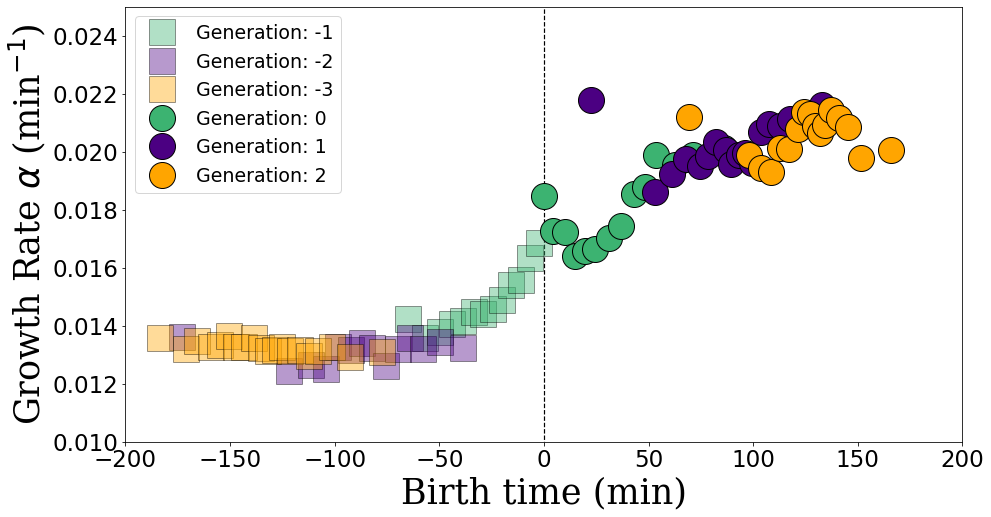

In [55]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.025,color='k',  ls='--',lw = 1.2)
plt.plot(data_growth_generation1_before_model['t0Trans'], data_growth_generation1_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=60, label = 'Generation: -1')
plt.plot(data_growth_generation2_before_model['t0Trans'], data_growth_generation2_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=60, label = 'Generation: -2')
plt.plot(data_growth_generation3_before_model['t0Trans'], data_growth_generation3_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=40, label = 'Generation: -3')
plt.plot(data_growth_generation1_after_model['t0Trans'], data_growth_generation1_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=60, label = 'Generation: 0')
plt.plot(data_growth_generation2_after_model['t0Trans'], data_growth_generation2_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=50, label = 'Generation: 1')
plt.plot(data_growth_generation3_after_model['t0Trans'], data_growth_generation3_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=50, label = 'Generation: 2')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Growth Rate $\alpha$ (min$^{-1}$)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0.01,0.025)
#plt.savefig(f"{images_dir_Generations}/GrowthBeforeAfterModel.pdf", bbox_inches="tight")

### **Interdivision time**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

(0.0, 120.0)

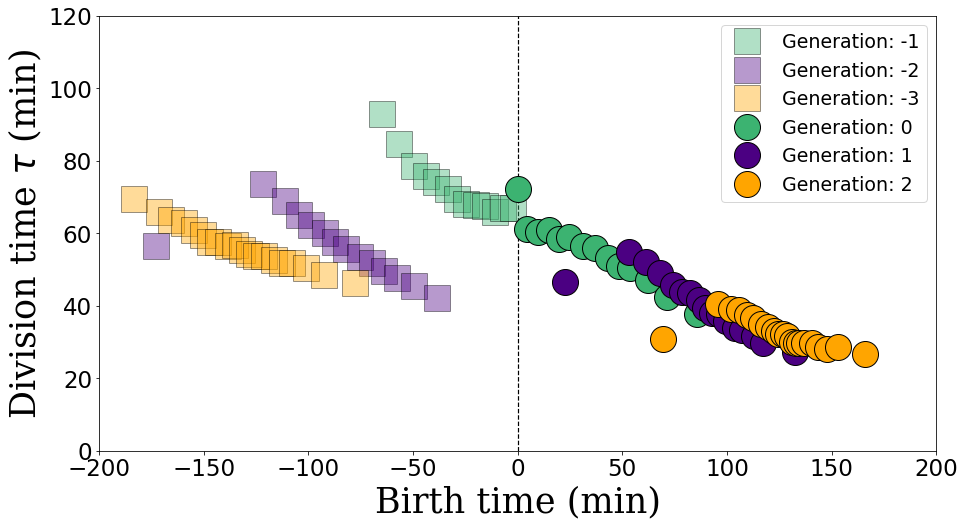

In [53]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=120,color='k',  ls='--',lw = 1.2)
plt.plot(data_generation1_before_model['t0Trans'], data_generation1_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=60, label = 'Generation: -1')
plt.plot(data_generation2_before_model['t0Trans'], data_generation2_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=60, label = 'Generation: -2')
plt.plot(data_generation3_before_model['t0Trans'], data_generation3_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=40, label = 'Generation: -3')
plt.plot(data_generation1_after_model['t0Trans'], data_generation1_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=60, label = 'Generation: 0')
plt.plot(data_generation2_after_model['t0Trans'], data_generation2_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=50, label = 'Generation: 1')
plt.plot(data_generation3_after_model['t0Trans'], data_generation3_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=40, label = 'Generation: 2')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Division time $\tau$ (min)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0,120)
#plt.savefig(f"{images_dir_Generations}/InterdivisionTimeBeforeAfterModel.pdf", bbox_inches="tight")

### **Added size**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

(0.5, 3.0)

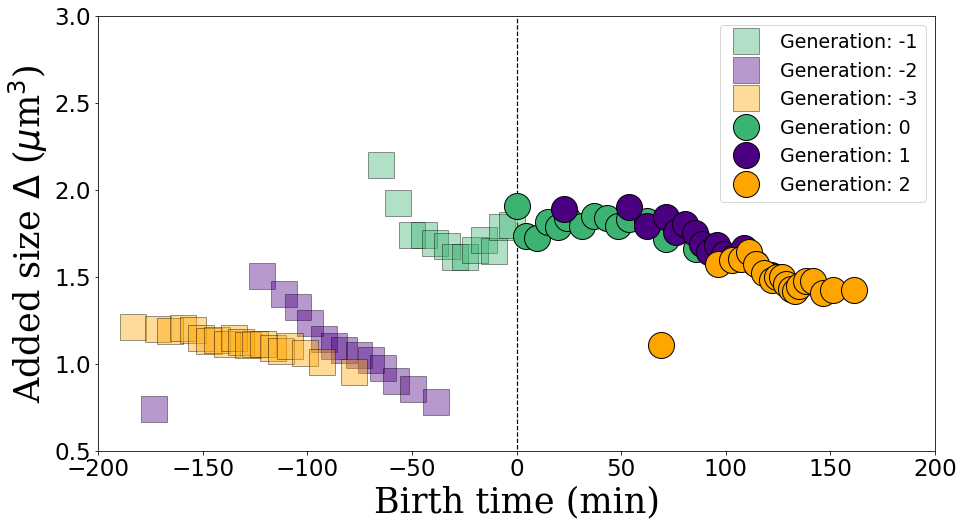

In [54]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=3,color='k',  ls='--',lw = 1.2)
plt.plot(data_added_generation1_before_model['t0Trans'], data_added_generation1_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=60, label = 'Generation: -1')
plt.plot(data_added_generation2_before_model['t0Trans'], data_added_generation2_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=60, label = 'Generation: -2')
plt.plot(data_added_generation3_before_model['t0Trans'], data_added_generation3_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=40, label = 'Generation: -3')
plt.plot(data_added_generation1_after_model['t0Trans'], data_added_generation1_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=60, label = 'Generation: 0')
plt.plot(data_added_generation2_after_model['t0Trans'], data_added_generation2_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=55, label = 'Generation: 1')
plt.plot(data_added_generation3_after_model['t0Trans'], data_added_generation3_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=44, label = 'Generation: 2')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Added size $\Delta$ ($\mu$m$^{3}$)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0.5,3)
#plt.savefig(f"{images_dir_Generations}/AddedSizeBeforeAfterModel.pdf", bbox_inches="tight")

## **Comparison of each generation with the model**

### **Growth rate**

#### **Generation 1 and -1**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

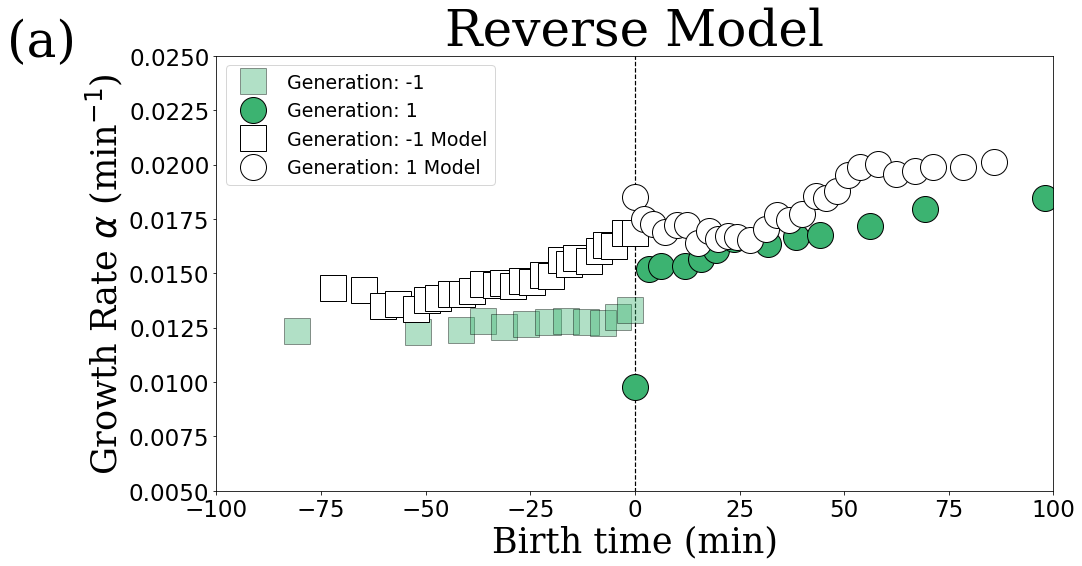

In [56]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.025,color='k',  ls='--',lw = 1.2)
plt.plot(data_growth_generation1_before['t0Trans'], data_growth_generation1_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=30, label = 'Generation: -1')
plt.plot(data_growth_generation1_after['t0Trans'], data_growth_generation1_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=30, label = 'Generation: 1')
plt.plot(data_growth_generation1_before_model['t0Trans'], data_growth_generation1_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: -1 Model')
plt.plot(data_growth_generation1_after_model['t0Trans'], data_growth_generation1_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: 1 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Growth Rate $\alpha$ (min$^{-1}$)', family="serif", fontsize = 35)
plt.xlim(-100,100)
plt.ylim(0.005,0.025)
plt.text(-150, 0.0250, r'(a)', family='serif', size = 50)
plt.title(r'Reverse Model', family='serif', size = 50 )
#plt.savefig(f"{images_dir_Generations}/GrowthRate_Data_Model_Gen-1_0.png", bbox_inches="tight", dpi=100)

#### **Generation 2 and -2**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(-300, 0.025, '(b)')

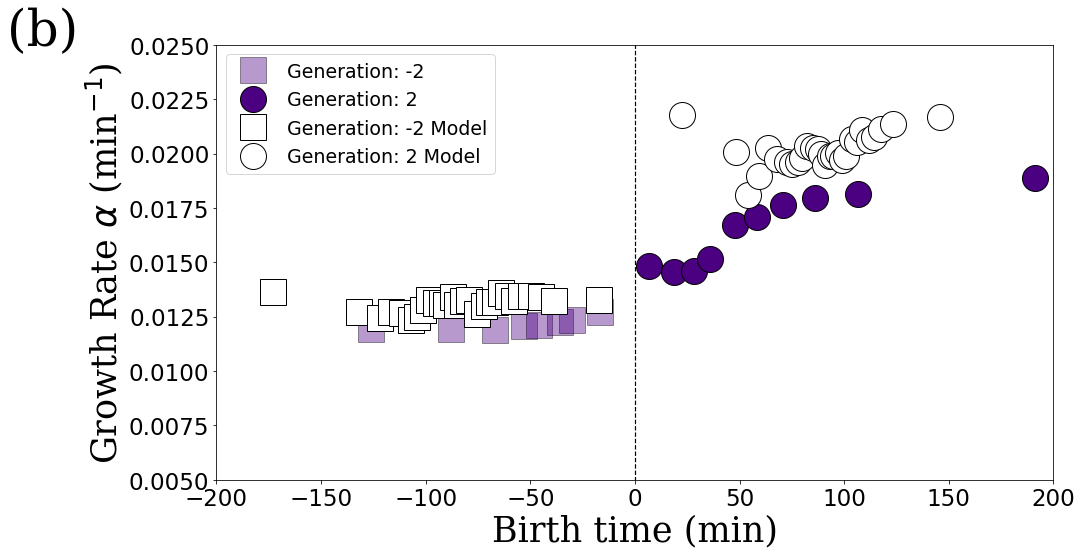

In [57]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.025,color='k',  ls='--',lw = 1.2)
plt.plot(data_growth_generation2_before['t0Trans'], data_growth_generation2_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=20, label = 'Generation: -2')
plt.plot(data_growth_generation2_after['t0Trans'], data_growth_generation2_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=20, label = 'Generation: 2')
plt.plot(data_growth_generation2_before_model['t0Trans'], data_growth_generation2_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: -2 Model')
plt.plot(data_growth_generation2_after_model['t0Trans'], data_growth_generation2_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: 2 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Growth Rate $\alpha$ (min$^{-1}$)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0.005,0.025)
plt.text(-300, 0.0250, r'(b)', family='serif', size = 50)
#plt.savefig(f"{images_dir_Generations}/GrowthRate_Data_Model_Gen-2_1.png", bbox_inches="tight", dpi=100)

#### **Generation 3 and -3**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(-300, 0.025, '(c)')

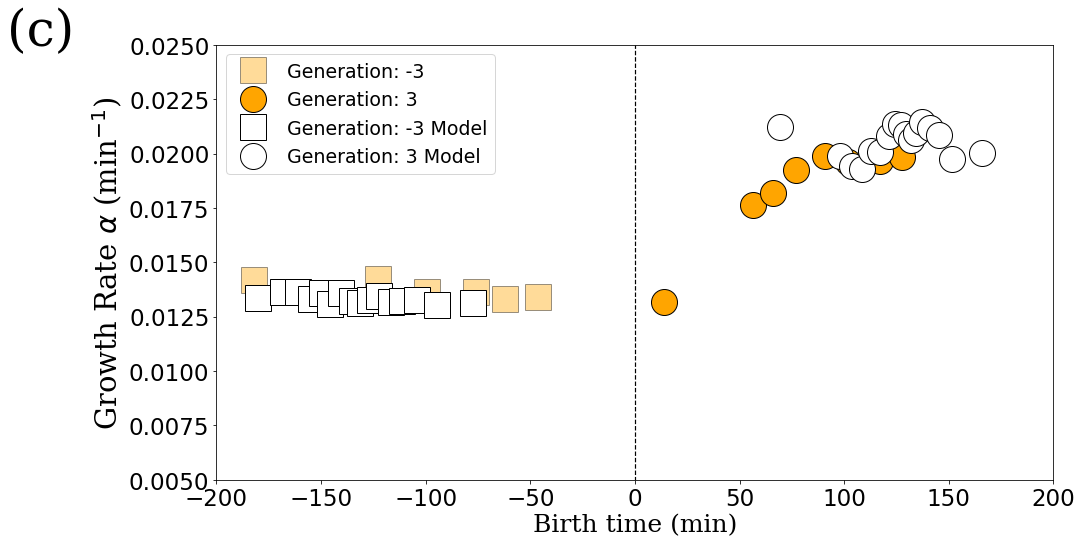

In [58]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.025,color='k',  ls='--',lw = 1.2)
plt.plot(data_growth_generation3_before['t0Trans'], data_growth_generation3_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=10, label = 'Generation: -3')
plt.plot(data_growth_generation3_after['t0Trans'], data_growth_generation3_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=10, label = 'Generation: 3')
plt.plot(data_growth_generation3_before_model['t0Trans'], data_growth_generation3_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=50, label = 'Generation: -3 Model')
plt.plot(data_growth_generation3_after_model['t0Trans'], data_growth_generation3_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=50, label = 'Generation: 3 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 25)
plt.ylabel(r'Growth Rate $\alpha$ (min$^{-1}$)', family="serif", fontsize = 29)
plt.xlim(-200,200)
plt.ylim(0.005,0.025)
plt.text(-300, 0.0250, r'(c)', family='serif', size = 50)
#plt.savefig(f"{images_dir_Generations}/GrowthRate_Data_Model_Gen-3_2.png", bbox_inches="tight", dpi=100)

### **Interdivision time**

#### **Generation 1 and -1**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(0.5, 1.0, 'Reverse Model')

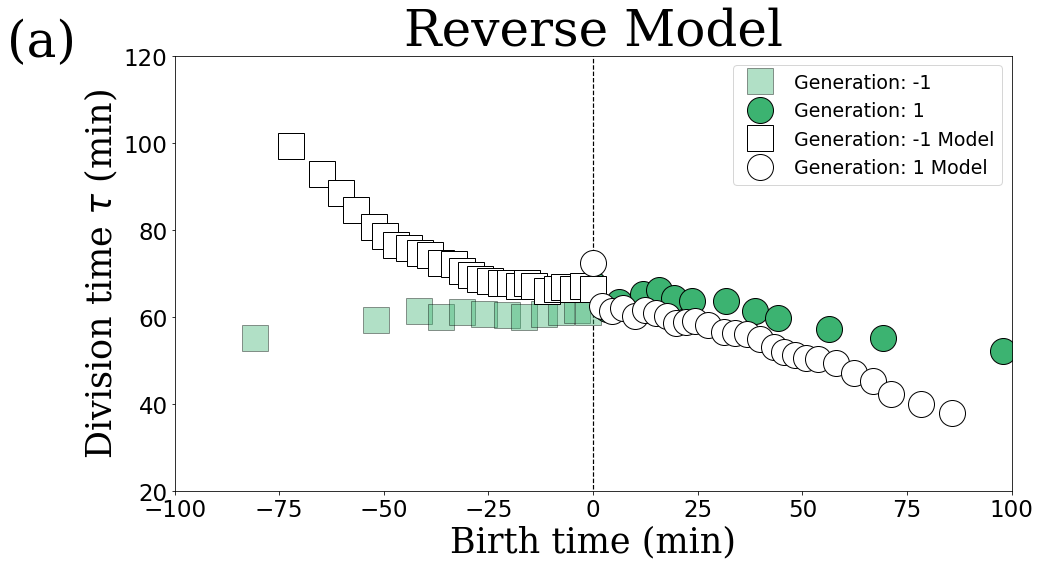

In [59]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=120,color='k',  ls='--',lw = 1.2)
plt.plot(data_generation1_before['t0Trans'], data_generation1_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=30, label = 'Generation: -1')
plt.plot(data_generation1_after['t0Trans'], data_generation1_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=30, label = 'Generation: 1')
plt.plot(data_generation1_before_model['t0Trans'], data_generation1_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: -1 Model')
plt.plot(data_generation1_after_model['t0Trans'], data_generation1_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: 1 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Division time $\tau$ (min)', family="serif", fontsize = 35)
plt.xlim(-100,100)
plt.ylim(20,120)
plt.text(-140, 120, r'(a)', family='serif', size = 50)
plt.title(r'Reverse Model', family='serif', size = 50 )
#plt.savefig(f"{images_dir_Generations}/InterdivisionTime_Data_Model_Gen-1_0.png", bbox_inches="tight", dpi=100)

#### **Generation 2 and -2**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(-180, 100, '(b)')

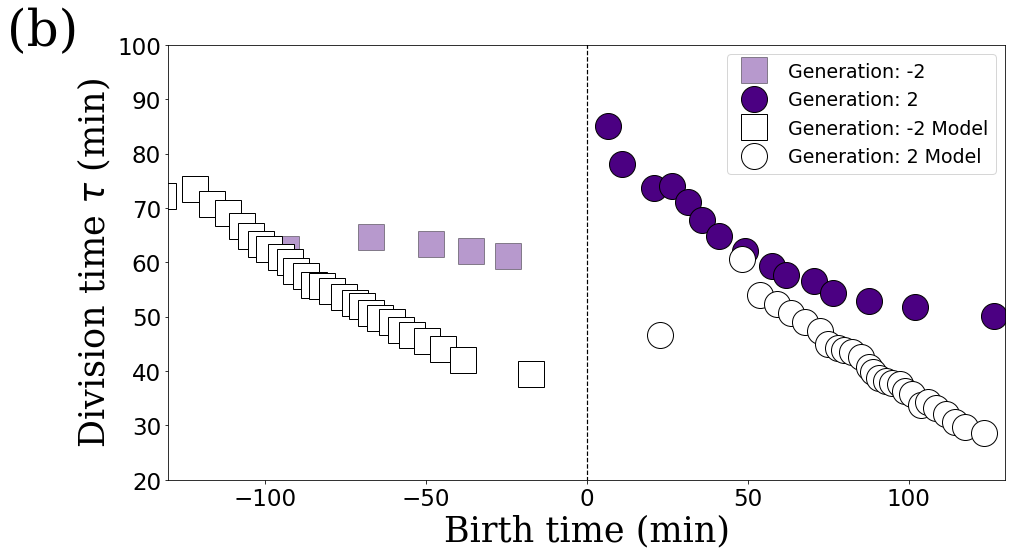

In [60]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=120,color='k',  ls='--',lw = 1.2)
plt.plot(data_generation2_before['t0Trans'], data_generation2_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=5,markevery=30, label = 'Generation: -2')
plt.plot(data_generation2_after['t0Trans'], data_generation2_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=12, label = 'Generation: 2')
plt.plot(data_generation2_before_model['t0Trans'], data_generation2_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: -2 Model')
plt.plot(data_generation2_after_model['t0Trans'], data_generation2_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: 2 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Division time $\tau$ (min)', family="serif", fontsize = 35)
plt.xlim(-130,130)
plt.ylim(20,100)
plt.text(-180, 100, r'(b)', family='serif', size = 50)
#plt.savefig(f"{images_dir_Generations}/InterdivisionTime_Data_Model_Gen-2_1.png", bbox_inches="tight", dpi=100)

#### **Generation 3 and -3**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(-270, 90, '(c)')

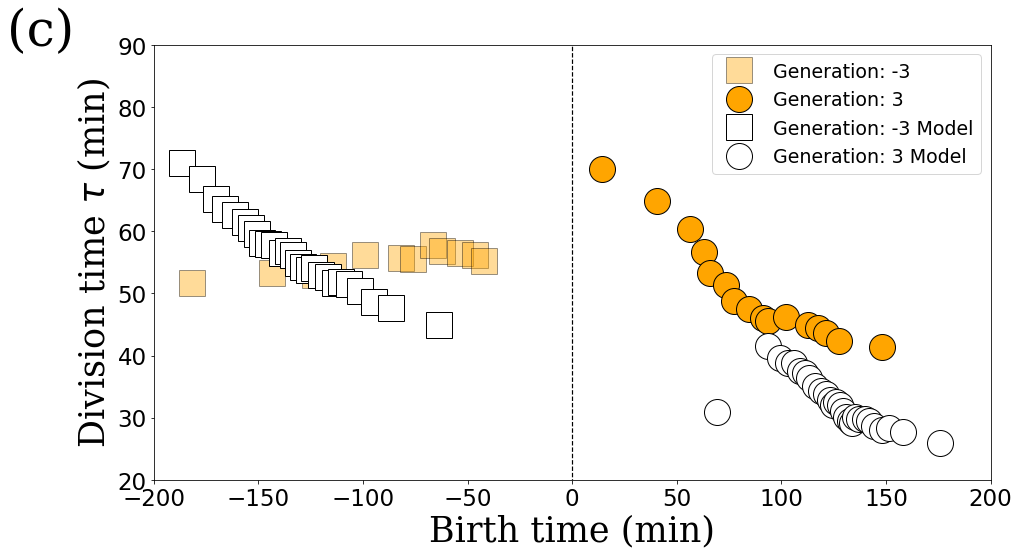

In [61]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=120,color='k',  ls='--',lw = 1.2)
plt.plot(data_generation3_before['t0Trans'], data_generation3_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=5, label = 'Generation: -3')
plt.plot(data_generation3_after['t0Trans'], data_generation3_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=5, label = 'Generation: 3')
plt.plot(data_generation3_before_model['t0Trans'], data_generation3_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: -3 Model')
plt.plot(data_generation3_after_model['t0Trans'], data_generation3_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: 3 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Division time $\tau$ (min)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(20,90)
plt.text(-270, 90, r'(c)', family='serif', size = 50)
#plt.savefig(f"{images_dir_Generations}/InterdivisionTime_Data_Model_Gen-3_2.png", bbox_inches="tight", dpi=100)

### **Added size**

#### **Generation 1 and -1**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(0.5, 1.0, 'Reverse Model')

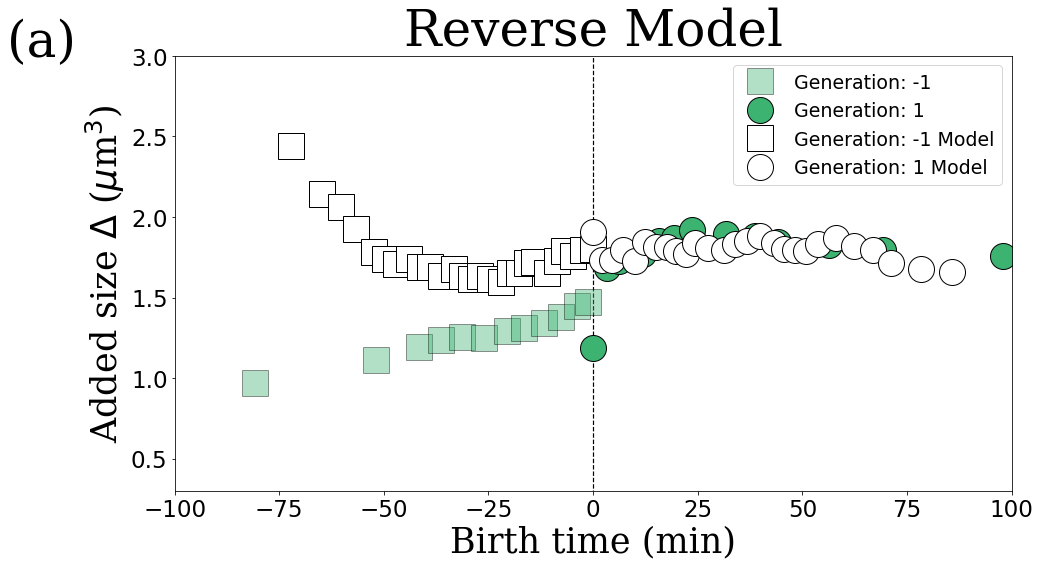

In [62]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=3,color='k',  ls='--',lw = 1.2)
plt.plot(data_added_generation1_before['t0Trans'], data_added_generation1_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="mediumseagreen", alpha = 0.4, ms=10,markevery=30, label = 'Generation: -1')
plt.plot(data_added_generation1_after['t0Trans'], data_added_generation1_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="mediumseagreen", ms=10,markevery=30, label = 'Generation: 1')
plt.plot(data_added_generation1_before_model['t0Trans'], data_added_generation1_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: -1 Model')
plt.plot(data_added_generation1_after_model['t0Trans'], data_added_generation1_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=30, label = 'Generation: 1 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Added size $\Delta$ ($\mu$m$^{3}$)', family="serif", fontsize = 35)
plt.xlim(-100,100)
plt.ylim(0.3,3)
plt.text(-140, 3, r'(a)', family='serif', size = 50)
plt.title(r'Reverse Model', family='serif', size = 50 )
#plt.savefig(f"{images_dir_Generations}/AddedSize_Data_Model_Gen-1_0.png", bbox_inches="tight", dpi=100)

#### **Generation 2 and -2**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(-280, 3, '(b)')

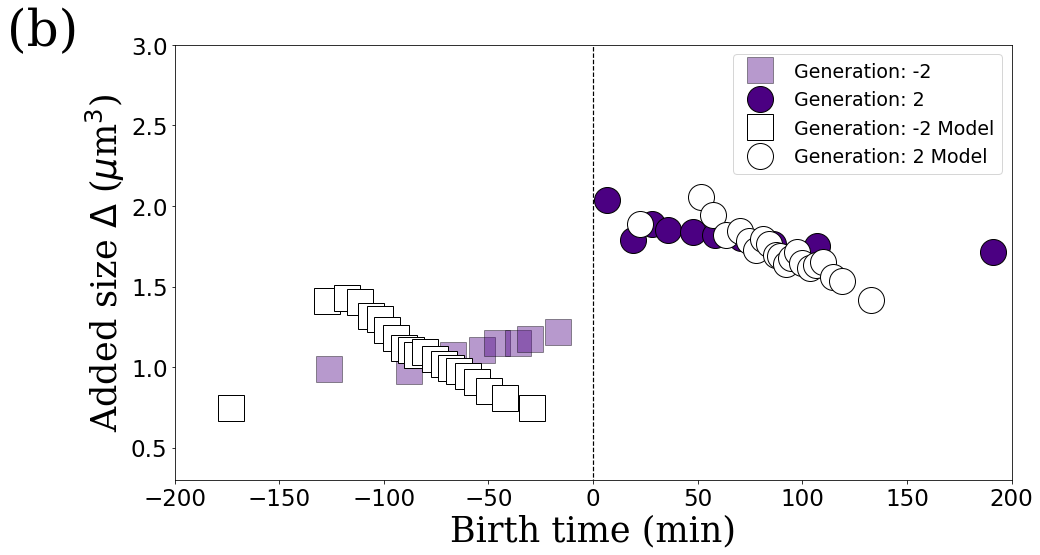

In [63]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=3,color='k',  ls='--',lw = 1.2)
plt.plot(data_added_generation2_before['t0Trans'], data_added_generation2_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="indigo", alpha = 0.4, ms=10,markevery=20, label = 'Generation: -2')
plt.plot(data_added_generation2_after['t0Trans'], data_added_generation2_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="indigo", ms=10,markevery=20, label = 'Generation: 2')
plt.plot(data_added_generation2_before_model['t0Trans'], data_added_generation2_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=40, label = 'Generation: -2 Model')
plt.plot(data_added_generation2_after_model['t0Trans'], data_added_generation2_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=40, label = 'Generation: 2 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Added size $\Delta$ ($\mu$m$^{3}$)', family="serif", fontsize = 35)
plt.xlim(-200,200)
plt.ylim(0.3,3)
plt.text(-280, 3, r'(b)', family='serif', size = 50)
#plt.savefig(f"{images_dir_Generations}/AddedSize_Data_Model_Gen-2_1.png", bbox_inches="tight", dpi=100)

#### **Generation 3 and -3**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for '

Text(-420, 3, '(c)')

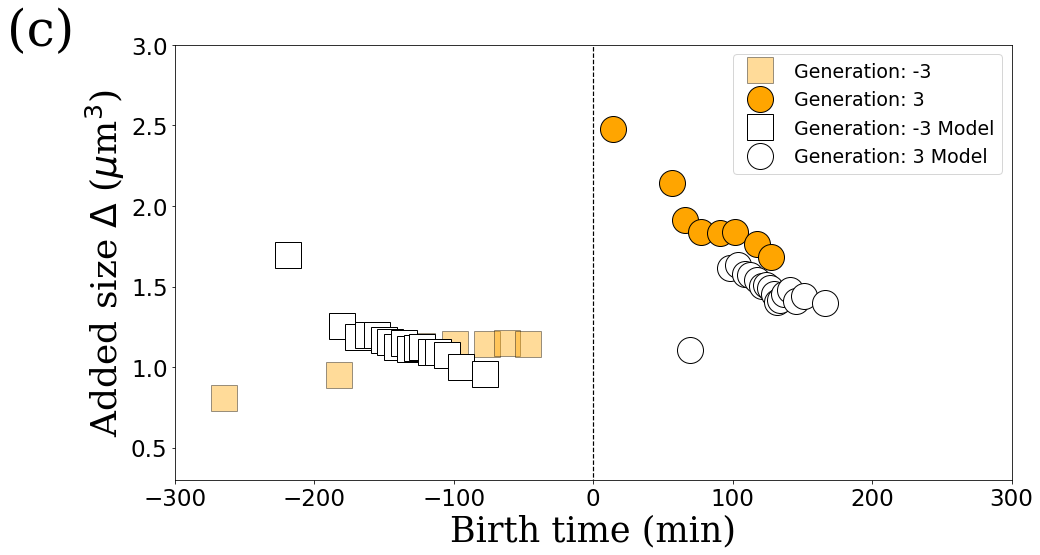

In [64]:
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=3,color='k',  ls='--',lw = 1.2)
plt.plot(data_added_generation3_before['t0Trans'], data_added_generation3_before['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="orange", alpha = 0.4, ms=10,markevery=10, label = 'Generation: -3')
plt.plot(data_added_generation3_after['t0Trans'], data_added_generation3_after['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="orange", ms=10,markevery=10, label = 'Generation: 3')
plt.plot(data_added_generation3_before_model['t0Trans'], data_added_generation3_before_model['Rolling average'],ls=" ",color="k",marker= 's', markersize= 26,markerfacecolor="w", ms=10,markevery=50, label = 'Generation: -3 Model')
plt.plot(data_added_generation3_after_model['t0Trans'], data_added_generation3_after_model['Rolling average'],ls=" ",color="k",marker= 'o', markersize= 26,markerfacecolor="w", ms=10,markevery=50, label = 'Generation: 3 Model')
plt.legend(prop={"size":19})
plt.xlabel(r'Birth time (min)', family="serif",fontsize = 35)
plt.ylabel(r'Added size $\Delta$ ($\mu$m$^{3}$)', family="serif", fontsize = 36)
plt.xlim(-300,300)
plt.ylim(0.3,3)
plt.text(-420, 3, r'(c)', family='serif', size = 50)
#plt.savefig(f"{images_dir_Generations}/AddedSize_Data_Model_Gen-3_2.png", bbox_inches="tight", dpi=100)